In [1]:
# Loaded variable 'df' from URI: /Users/valentingoupille/Desktop/microsplit_DOL/data/raw_data/metadata_cell/metadata_DOL_rep1.xlsx
import pandas as pd

df = pd.read_excel(
    r"/Users/valentingoupille/Desktop/microsplit_DOL/data/raw_data/metadata_cell/metadata_DOL_rep1.xlsx"
)

In [2]:
# Loaded variable 'df' from URI: /Users/valentingoupille/Desktop/microsplit_DOL/data/raw_data/metadata_cell/metadata_DOL_rep1.xlsx
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
df = pd.read_excel(
    r"/Users/valentingoupille/Desktop/microsplit_DOL/data/raw_data/metadata_cell/metadata_DOL_rep1.xlsx"
)

In [3]:
df

,Sample_ID,Culture_medium,Rep_bio,Rep_tech,OD_timepoint,OD_theoric,OD_measured,Condition,Well_loc_rd1
0,M9_A_1_OD1,M9,A,1,OD1,0.1,0.13,stress,A1
1,M9_A_2_OD1,M9,A,2,OD1,0.1,0.13,stress,B1
2,M9_A_3_OD1,M9,A,3,OD1,0.1,0.13,stress,C1
3,M9_A_4_OD1,M9,A,4,OD1,0.1,0.13,stress,D1
4,M9_A_5_OD1,M9,A,5,OD1,0.1,0.13,stress,A10
...,...,...,...,...,...,...,...,...,...
85,M9F_C_1_OD3,M9F,C,1,OD3,0.8,0.74,control,E9
86,M9F_C_2_OD3,M9F,C,2,OD3,0.8,0.74,control,F9
87,M9F_C_3_OD3,M9F,C,3,OD3,0.8,0.74,control,G9
88,M9F_C_4_OD3,M9F,C,4,OD3,0.8,0.74,control,H9


=== Statistiques OD_measured par combinaison ===
              mean  std  count    min    max
combination                                 
M9F_A_OD1    0.173  0.0      5  0.173  0.173
M9F_A_OD2    0.588  0.0      5  0.588  0.588
M9F_A_OD3    0.773  0.0      5  0.773  0.773
M9F_B_OD1    0.208  0.0      5  0.208  0.208
M9F_B_OD2    0.627  0.0      5  0.627  0.627
M9F_B_OD3    0.834  0.0      5  0.834  0.834
M9F_C_OD1    0.168  0.0      5  0.168  0.168
M9F_C_OD2    0.603  0.0      5  0.603  0.603
M9F_C_OD3    0.740  0.0      5  0.740  0.740
M9_A_OD1     0.130  0.0      5  0.130  0.130
M9_A_OD2     0.280  0.0      5  0.280  0.280
M9_A_OD3     0.260  0.0      5  0.260  0.260
M9_B_OD1     0.130  0.0      5  0.130  0.130
M9_B_OD2     0.280  0.0      5  0.280  0.280
M9_B_OD3     0.260  0.0      5  0.260  0.260
M9_C_OD1     0.130  0.0      5  0.130  0.130
M9_C_OD2     0.328  0.0      5  0.328  0.328
M9_C_OD3     0.260  0.0      5  0.260  0.260

=== Valeurs OD_measured détaillées par combinaison

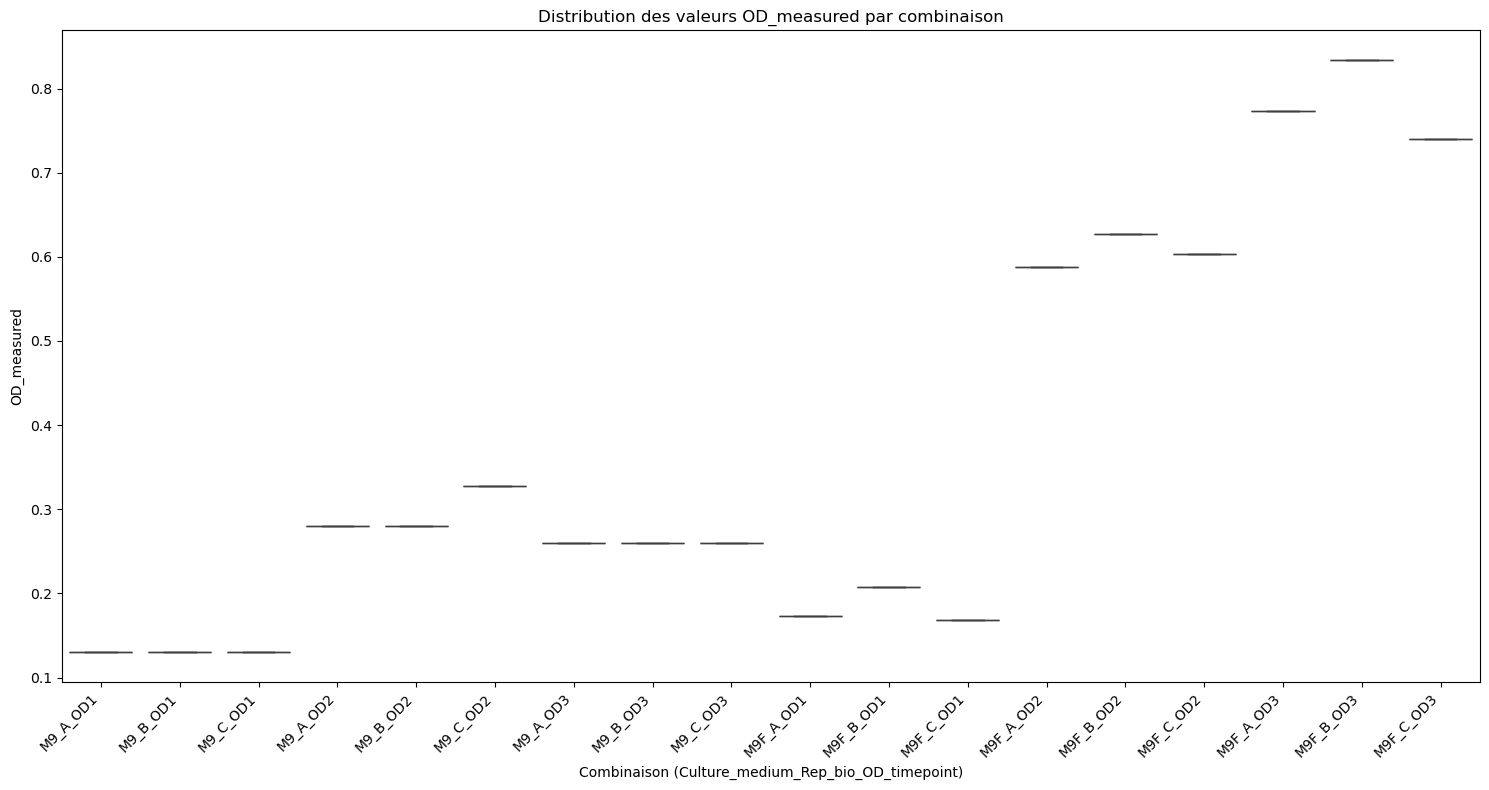


=== Tableau croisé des moyennes OD_measured ===
OD_timepoint              OD1    OD2    OD3
Culture_medium Rep_bio                     
M9             A        0.130  0.280  0.260
               B        0.130  0.280  0.260
               C        0.130  0.328  0.260
M9F            A        0.173  0.588  0.773
               B        0.208  0.627  0.834
               C        0.168  0.603  0.740


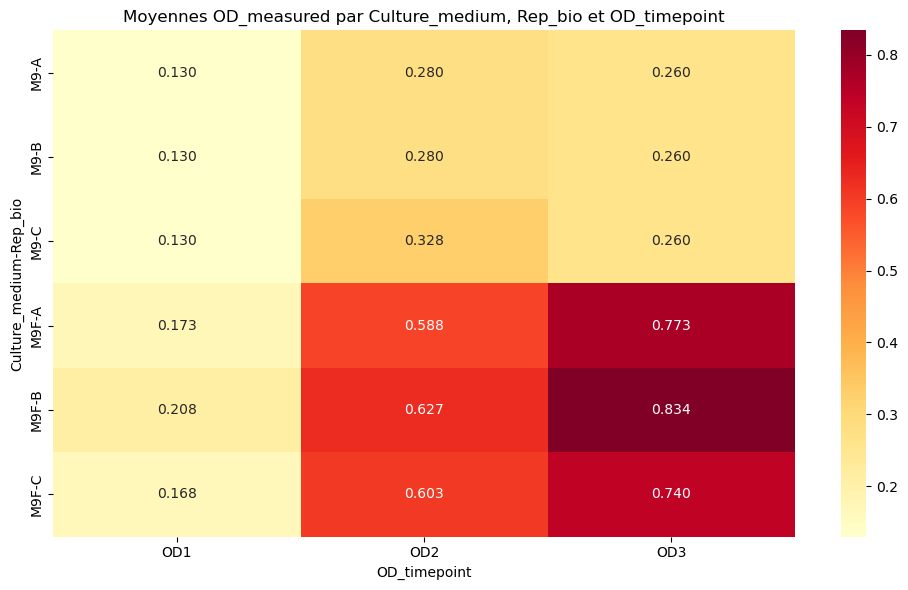

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
df = pd.read_excel(
    r"/Users/valentingoupille/Desktop/microsplit_DOL/data/raw_data/metadata_cell/metadata_DOL_rep1.xlsx"
)

# Create a combination column for easier analysis
df["combination"] = (
    df["Culture_medium"] + "_" + df["Rep_bio"] + "_" + df["OD_timepoint"]
)

# Group by combination and calculate statistics
od_stats = (
    df.groupby("combination")["OD_measured"]
    .agg(["mean", "std", "count", "min", "max"])
    .round(3)
)

print("=== Statistiques OD_measured par combinaison ===")
print(od_stats)

print("\n=== Valeurs OD_measured détaillées par combinaison ===")
for combo in df["combination"].unique():
    combo_data = df[df["combination"] == combo]
    print(f"\n{combo}:")
    print(f"  OD_measured: {combo_data['OD_measured'].tolist()}")
    print(f"  Moyenne: {combo_data['OD_measured'].mean():.3f}")
    print(f"  Écart-type: {combo_data['OD_measured'].std():.3f}")

# Create a boxplot to visualize the distributions
plt.figure(figsize=(15, 8))
sns.boxplot(data=df, x="combination", y="OD_measured")
plt.xticks(rotation=45, ha="right")
plt.title("Distribution des valeurs OD_measured par combinaison")
plt.xlabel("Combinaison (Culture_medium_Rep_bio_OD_timepoint)")
plt.ylabel("OD_measured")
plt.tight_layout()
plt.show()

# Create a heatmap of mean OD values
pivot_table = df.pivot_table(
    values="OD_measured",
    index=["Culture_medium", "Rep_bio"],
    columns="OD_timepoint",
    aggfunc="mean",
).round(3)

print("\n=== Tableau croisé des moyennes OD_measured ===")
print(pivot_table)

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table, annot=True, cmap="YlOrRd", fmt=".3f")
plt.title("Moyennes OD_measured par Culture_medium, Rep_bio et OD_timepoint")
plt.tight_layout()
plt.show()

=== Valeurs OD_measured individuelles par combinaison ===

M9F_A_OD1:
  Rep_tech 1: OD_measured = 0.173
  Rep_tech 2: OD_measured = 0.173
  Rep_tech 3: OD_measured = 0.173
  Rep_tech 4: OD_measured = 0.173
  Rep_tech 5: OD_measured = 0.173

M9F_A_OD2:
  Rep_tech 1: OD_measured = 0.588
  Rep_tech 2: OD_measured = 0.588
  Rep_tech 3: OD_measured = 0.588
  Rep_tech 4: OD_measured = 0.588
  Rep_tech 5: OD_measured = 0.588

M9F_A_OD3:
  Rep_tech 1: OD_measured = 0.773
  Rep_tech 2: OD_measured = 0.773
  Rep_tech 3: OD_measured = 0.773
  Rep_tech 4: OD_measured = 0.773
  Rep_tech 5: OD_measured = 0.773

M9F_B_OD1:
  Rep_tech 1: OD_measured = 0.208
  Rep_tech 2: OD_measured = 0.208
  Rep_tech 3: OD_measured = 0.208
  Rep_tech 4: OD_measured = 0.208
  Rep_tech 5: OD_measured = 0.208

M9F_B_OD2:
  Rep_tech 1: OD_measured = 0.627
  Rep_tech 2: OD_measured = 0.627
  Rep_tech 3: OD_measured = 0.627
  Rep_tech 4: OD_measured = 0.627
  Rep_tech 5: OD_measured = 0.627

M9F_B_OD3:
  Rep_tech 1: OD_mea

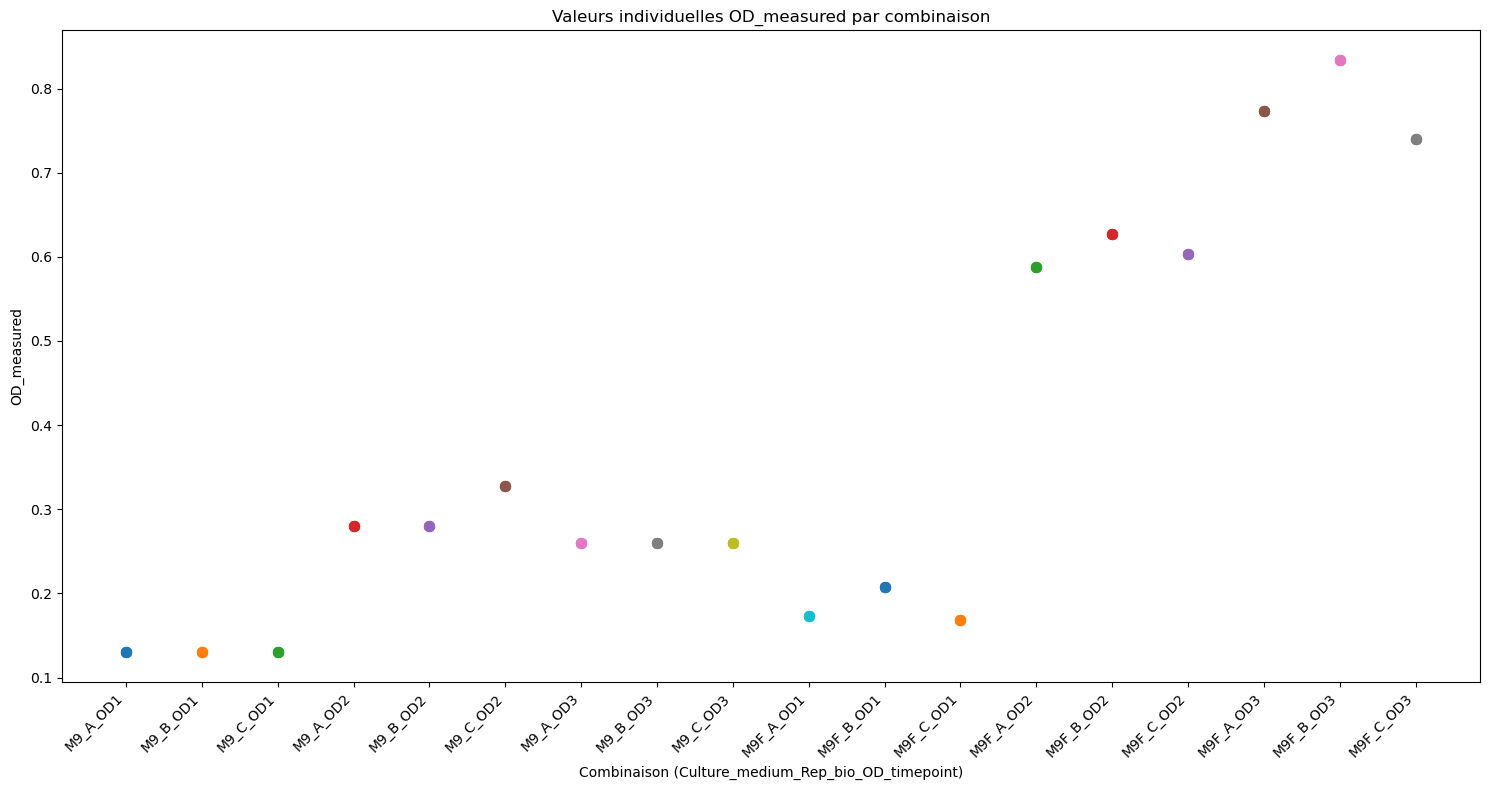


=== Tableau des valeurs individuelles ===
Culture_medium Rep_bio OD_timepoint  Rep_tech  OD_measured
            M9       A          OD1         1        0.130
            M9       A          OD1         2        0.130
            M9       A          OD1         3        0.130
            M9       A          OD1         4        0.130
            M9       A          OD1         5        0.130
            M9       A          OD2         1        0.280
            M9       A          OD2         2        0.280
            M9       A          OD2         3        0.280
            M9       A          OD2         4        0.280
            M9       A          OD2         5        0.280
            M9       A          OD3         1        0.260
            M9       A          OD3         2        0.260
            M9       A          OD3         3        0.260
            M9       A          OD3         4        0.260
            M9       A          OD3         5        0.260
            M

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
df = pd.read_excel(
    r"/Users/valentingoupille/Desktop/microsplit_DOL/data/raw_data/metadata_cell/metadata_DOL_rep1.xlsx"
)

# Create a combination column for easier analysis
df["combination"] = (
    df["Culture_medium"] + "_" + df["Rep_bio"] + "_" + df["OD_timepoint"]
)

print("=== Valeurs OD_measured individuelles par combinaison ===")
for combo in sorted(df["combination"].unique()):
    combo_data = df[df["combination"] == combo]
    print(f"\n{combo}:")
    for idx, row in combo_data.iterrows():
        print(f"  Rep_tech {row['Rep_tech']}: OD_measured = {row['OD_measured']:.3f}")

# Create a scatter plot to visualize individual values
plt.figure(figsize=(15, 8))
for combo in df["combination"].unique():
    combo_data = df[df["combination"] == combo]
    plt.scatter([combo] * len(combo_data), combo_data["OD_measured"], alpha=0.7, s=50)

plt.xticks(rotation=45, ha="right")
plt.title("Valeurs individuelles OD_measured par combinaison")
plt.xlabel("Combinaison (Culture_medium_Rep_bio_OD_timepoint)")
plt.ylabel("OD_measured")
plt.tight_layout()
plt.show()

# Create a table showing individual values
print("\n=== Tableau des valeurs individuelles ===")
display_df = df[
    ["Culture_medium", "Rep_bio", "OD_timepoint", "Rep_tech", "OD_measured"]
].sort_values(["Culture_medium", "Rep_bio", "OD_timepoint", "Rep_tech"])
print(display_df.to_string(index=False))

# Show summary by combination
print("\n=== Résumé par combinaison ===")
summary = (
    df.groupby("combination")
    .agg({"OD_measured": ["count", "min", "max"], "Rep_tech": lambda x: list(x)})
    .round(3)
)
print(summary)

=== Valeurs OD_measured individuelles par combinaison ===

M9F_A_OD1:
  OD_measured: 0.173
  Rep_tech: 1

M9F_A_OD2:
  OD_measured: 0.588
  Rep_tech: 1

M9F_A_OD3:
  OD_measured: 0.773
  Rep_tech: 1

M9F_B_OD1:
  OD_measured: 0.208
  Rep_tech: 1

M9F_B_OD2:
  OD_measured: 0.627
  Rep_tech: 1

M9F_B_OD3:
  OD_measured: 0.834
  Rep_tech: 1

M9F_C_OD1:
  OD_measured: 0.168
  Rep_tech: 1

M9F_C_OD2:
  OD_measured: 0.603
  Rep_tech: 1

M9F_C_OD3:
  OD_measured: 0.740
  Rep_tech: 1

M9_A_OD1:
  OD_measured: 0.130
  Rep_tech: 1

M9_A_OD2:
  OD_measured: 0.280
  Rep_tech: 1

M9_A_OD3:
  OD_measured: 0.260
  Rep_tech: 1

M9_B_OD1:
  OD_measured: 0.130
  Rep_tech: 1

M9_B_OD2:
  OD_measured: 0.280
  Rep_tech: 1

M9_B_OD3:
  OD_measured: 0.260
  Rep_tech: 1

M9_C_OD1:
  OD_measured: 0.130
  Rep_tech: 1

M9_C_OD2:
  OD_measured: 0.328
  Rep_tech: 1

M9_C_OD3:
  OD_measured: 0.260
  Rep_tech: 1


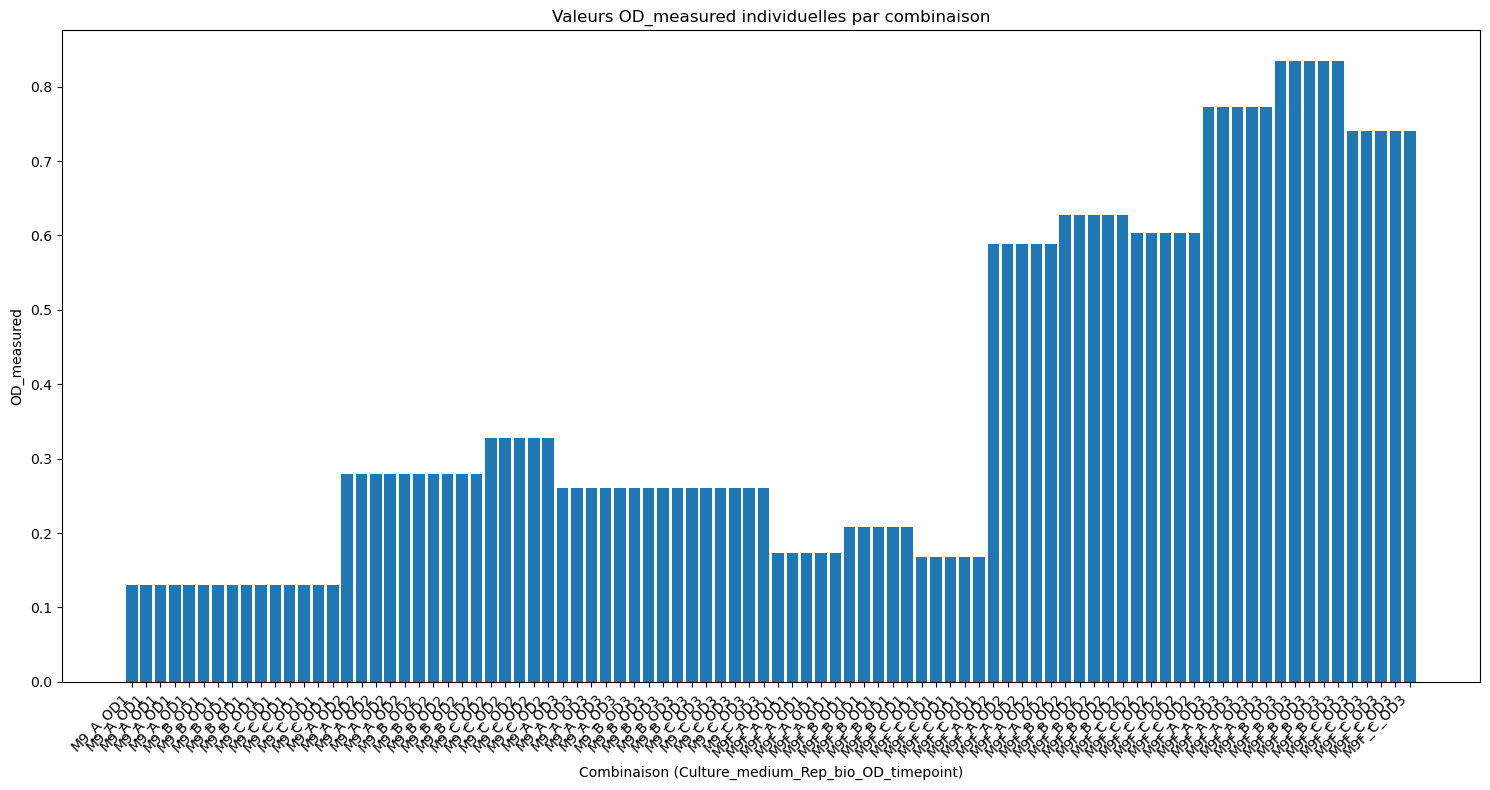


=== Tableau complet des combinaisons ===
Culture_medium Rep_bio OD_timepoint  Rep_tech  OD_measured
            M9       A          OD1         1        0.130
            M9       A          OD1         2        0.130
            M9       A          OD1         3        0.130
            M9       A          OD1         4        0.130
            M9       A          OD1         5        0.130
            M9       A          OD2         1        0.280
            M9       A          OD2         2        0.280
            M9       A          OD2         3        0.280
            M9       A          OD2         4        0.280
            M9       A          OD2         5        0.280
            M9       A          OD3         1        0.260
            M9       A          OD3         2        0.260
            M9       A          OD3         3        0.260
            M9       A          OD3         4        0.260
            M9       A          OD3         5        0.260
            M9

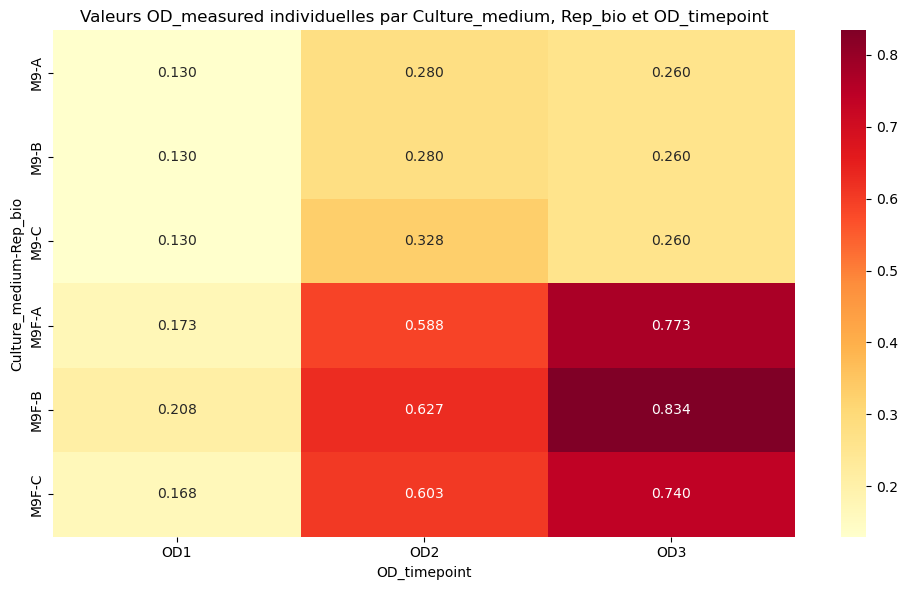

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
df = pd.read_excel(
    r"/Users/valentingoupille/Desktop/microsplit_DOL/data/raw_data/metadata_cell/metadata_DOL_rep1.xlsx"
)

# Create a combination column for easier analysis
df["combination"] = (
    df["Culture_medium"] + "_" + df["Rep_bio"] + "_" + df["OD_timepoint"]
)

print("=== Valeurs OD_measured individuelles par combinaison ===")
for combo in sorted(df["combination"].unique()):
    combo_data = df[df["combination"] == combo]
    print(f"\n{combo}:")
    print(f"  OD_measured: {combo_data['OD_measured'].iloc[0]:.3f}")
    print(f"  Rep_tech: {combo_data['Rep_tech'].iloc[0]}")

# Create a bar plot showing individual OD values
plt.figure(figsize=(15, 8))
bars = plt.bar(range(len(df)), df["OD_measured"])
plt.xticks(range(len(df)), df["combination"], rotation=45, ha="right")
plt.title("Valeurs OD_measured individuelles par combinaison")
plt.xlabel("Combinaison (Culture_medium_Rep_bio_OD_timepoint)")
plt.ylabel("OD_measured")
plt.tight_layout()
plt.show()

# Create a table showing all combinations with their OD values
print("\n=== Tableau complet des combinaisons ===")
result_table = df[
    ["Culture_medium", "Rep_bio", "OD_timepoint", "Rep_tech", "OD_measured"]
].copy()
result_table = result_table.sort_values(["Culture_medium", "Rep_bio", "OD_timepoint"])
print(result_table.to_string(index=False))

# Create a pivot table showing individual OD values
pivot_table = df.pivot_table(
    values="OD_measured",
    index=["Culture_medium", "Rep_bio"],
    columns="OD_timepoint",
    aggfunc="first",  # Use first value since there's only one per combination
).round(3)

print("\n=== Tableau croisé des valeurs OD_measured individuelles ===")
print(pivot_table)

# Plot heatmap of individual values
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table, annot=True, cmap="YlOrRd", fmt=".3f")
plt.title(
    "Valeurs OD_measured individuelles par Culture_medium, Rep_bio et OD_timepoint"
)
plt.tight_layout()
plt.show()

=== Valeurs OD_measured et OD_theoric individuelles par combinaison ===

M9F_A_OD1:
  OD_measured: 0.173
  OD_theoric: 0.100
  Rep_tech: 1

M9F_A_OD2:
  OD_measured: 0.588
  OD_theoric: 0.500
  Rep_tech: 1

M9F_A_OD3:
  OD_measured: 0.773
  OD_theoric: 0.800
  Rep_tech: 1

M9F_B_OD1:
  OD_measured: 0.208
  OD_theoric: 0.100
  Rep_tech: 1

M9F_B_OD2:
  OD_measured: 0.627
  OD_theoric: 0.500
  Rep_tech: 1

M9F_B_OD3:
  OD_measured: 0.834
  OD_theoric: 0.800
  Rep_tech: 1

M9F_C_OD1:
  OD_measured: 0.168
  OD_theoric: 0.100
  Rep_tech: 1

M9F_C_OD2:
  OD_measured: 0.603
  OD_theoric: 0.500
  Rep_tech: 1

M9F_C_OD3:
  OD_measured: 0.740
  OD_theoric: 0.800
  Rep_tech: 1

M9_A_OD1:
  OD_measured: 0.130
  OD_theoric: 0.100
  Rep_tech: 1

M9_A_OD2:
  OD_measured: 0.280
  OD_theoric: 0.500
  Rep_tech: 1

M9_A_OD3:
  OD_measured: 0.260
  OD_theoric: 0.800
  Rep_tech: 1

M9_B_OD1:
  OD_measured: 0.130
  OD_theoric: 0.100
  Rep_tech: 1

M9_B_OD2:
  OD_measured: 0.280
  OD_theoric: 0.500
  Rep_tec

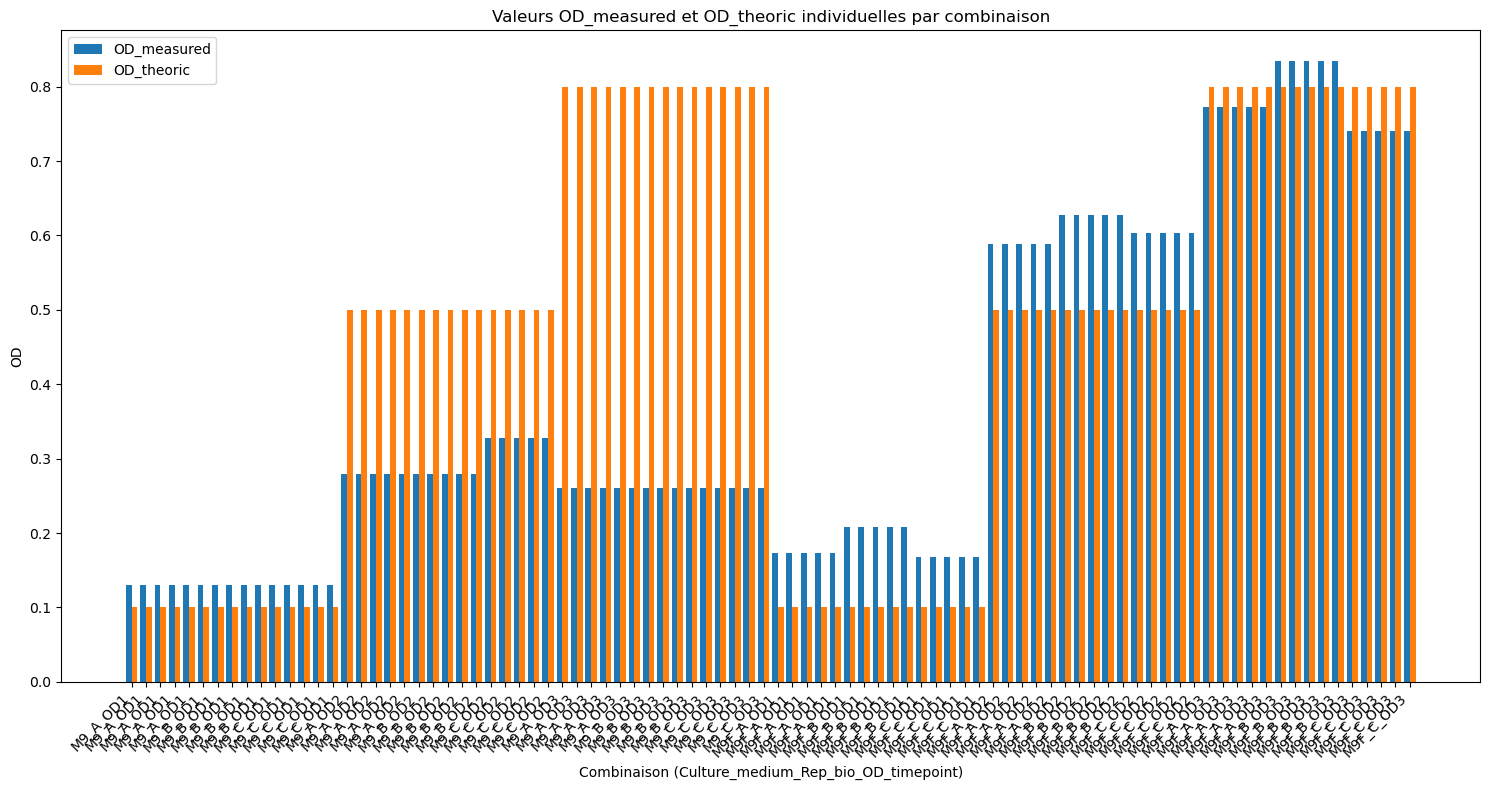


=== Tableau complet des combinaisons ===
Culture_medium Rep_bio OD_timepoint  Rep_tech  OD_theoric  OD_measured
            M9       A          OD1         1         0.1        0.130
            M9       A          OD1         2         0.1        0.130
            M9       A          OD1         3         0.1        0.130
            M9       A          OD1         4         0.1        0.130
            M9       A          OD1         5         0.1        0.130
            M9       A          OD2         1         0.5        0.280
            M9       A          OD2         2         0.5        0.280
            M9       A          OD2         3         0.5        0.280
            M9       A          OD2         4         0.5        0.280
            M9       A          OD2         5         0.5        0.280
            M9       A          OD3         1         0.8        0.260
            M9       A          OD3         2         0.8        0.260
            M9       A          OD3

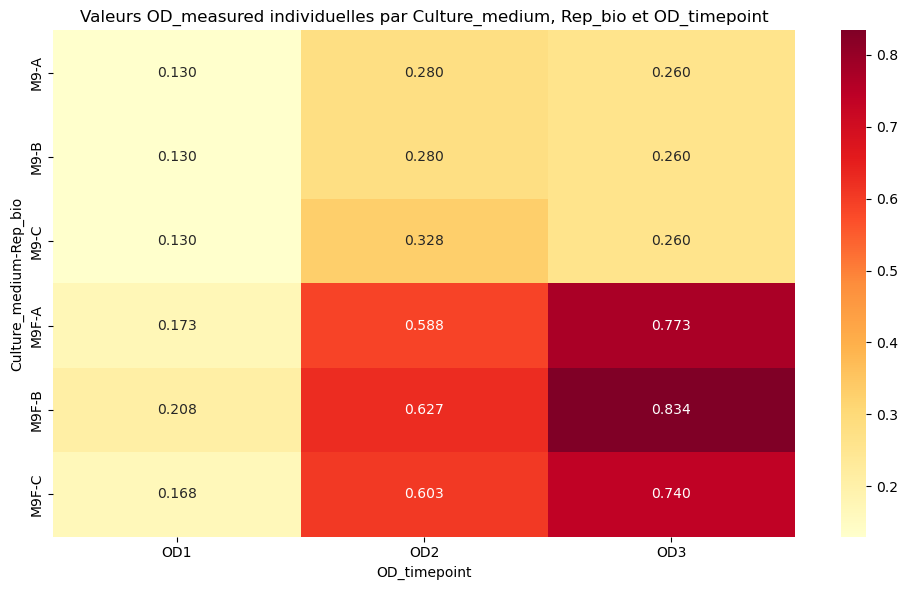

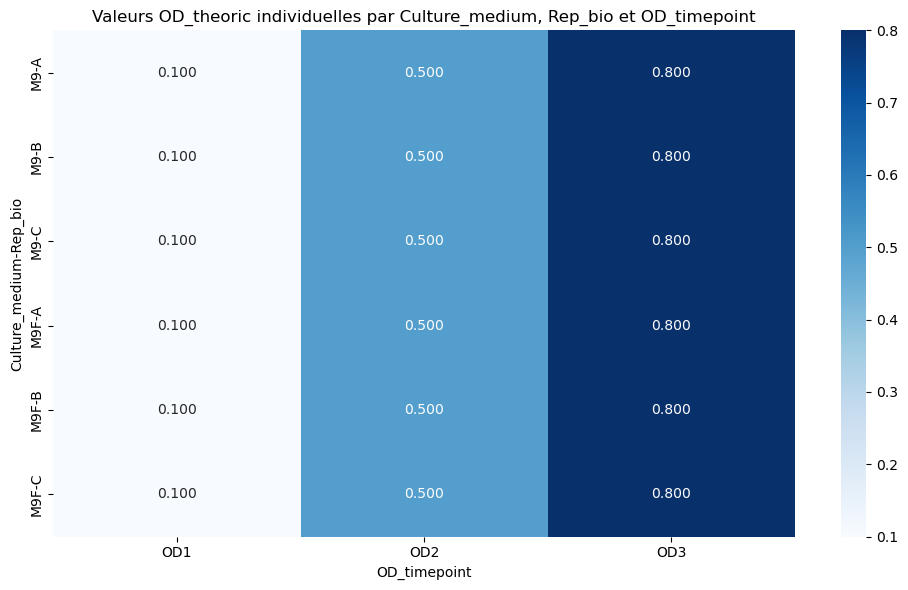

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
df = pd.read_excel(
    r"/Users/valentingoupille/Desktop/microsplit_DOL/data/raw_data/metadata_cell/metadata_DOL_rep1.xlsx"
)

# Create a combination column for easier analysis
df["combination"] = (
    df["Culture_medium"] + "_" + df["Rep_bio"] + "_" + df["OD_timepoint"]
)

print("=== Valeurs OD_measured et OD_theoric individuelles par combinaison ===")
for combo in sorted(df["combination"].unique()):
    combo_data = df[df["combination"] == combo]
    print(f"\n{combo}:")
    print(f"  OD_measured: {combo_data['OD_measured'].iloc[0]:.3f}")
    print(f"  OD_theoric: {combo_data['OD_theoric'].iloc[0]:.3f}")
    print(f"  Rep_tech: {combo_data['Rep_tech'].iloc[0]}")

# Create a bar plot showing individual OD values (measured vs theoric)
plt.figure(figsize=(15, 8))
bar_width = 0.4
indices = range(len(df))
plt.bar(indices, df["OD_measured"], width=bar_width, label="OD_measured")
plt.bar(
    [i + bar_width for i in indices],
    df["OD_theoric"],
    width=bar_width,
    label="OD_theoric",
)
plt.xticks(
    [i + bar_width / 2 for i in indices], df["combination"], rotation=45, ha="right"
)
plt.title("Valeurs OD_measured et OD_theoric individuelles par combinaison")
plt.xlabel("Combinaison (Culture_medium_Rep_bio_OD_timepoint)")
plt.ylabel("OD")
plt.legend()
plt.tight_layout()
plt.show()

# Create a table showing all combinations with their OD values
print("\n=== Tableau complet des combinaisons ===")
result_table = df[
    [
        "Culture_medium",
        "Rep_bio",
        "OD_timepoint",
        "Rep_tech",
        "OD_theoric",
        "OD_measured",
    ]
].copy()
result_table = result_table.sort_values(["Culture_medium", "Rep_bio", "OD_timepoint"])
print(result_table.to_string(index=False))

# Create a pivot table showing individual OD values (measured and theoric)
pivot_measured = df.pivot_table(
    values="OD_measured",
    index=["Culture_medium", "Rep_bio"],
    columns="OD_timepoint",
    aggfunc="first",  # Use first value since there's only one per combination
).round(3)
pivot_theoric = df.pivot_table(
    values="OD_theoric",
    index=["Culture_medium", "Rep_bio"],
    columns="OD_timepoint",
    aggfunc="first",
).round(3)

print("\n=== Tableau croisé des valeurs OD_measured individuelles ===")
print(pivot_measured)
print("\n=== Tableau croisé des valeurs OD_theoric individuelles ===")
print(pivot_theoric)

# Plot heatmap of individual values (measured)
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_measured, annot=True, cmap="YlOrRd", fmt=".3f")
plt.title(
    "Valeurs OD_measured individuelles par Culture_medium, Rep_bio et OD_timepoint"
)
plt.tight_layout()
plt.show()

# Plot heatmap of individual values (theoric)
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_theoric, annot=True, cmap="Blues", fmt=".3f")
plt.title(
    "Valeurs OD_theoric individuelles par Culture_medium, Rep_bio et OD_timepoint"
)
plt.tight_layout()
plt.show()

=== Valeurs OD_measured et OD_theoric individuelles par combinaison ===

M9F_A_OD1:
  OD_measured: 0.173
  OD_theoric: 0.100
  Rep_tech: 1

M9F_A_OD2:
  OD_measured: 0.588
  OD_theoric: 0.500
  Rep_tech: 1

M9F_A_OD3:
  OD_measured: 0.773
  OD_theoric: 0.800
  Rep_tech: 1

M9F_B_OD1:
  OD_measured: 0.208
  OD_theoric: 0.100
  Rep_tech: 1

M9F_B_OD2:
  OD_measured: 0.627
  OD_theoric: 0.500
  Rep_tech: 1

M9F_B_OD3:
  OD_measured: 0.834
  OD_theoric: 0.800
  Rep_tech: 1

M9F_C_OD1:
  OD_measured: 0.168
  OD_theoric: 0.100
  Rep_tech: 1

M9F_C_OD2:
  OD_measured: 0.603
  OD_theoric: 0.500
  Rep_tech: 1

M9F_C_OD3:
  OD_measured: 0.740
  OD_theoric: 0.800
  Rep_tech: 1

M9_A_OD1:
  OD_measured: 0.130
  OD_theoric: 0.100
  Rep_tech: 1

M9_A_OD2:
  OD_measured: 0.280
  OD_theoric: 0.500
  Rep_tech: 1

M9_A_OD3:
  OD_measured: 0.260
  OD_theoric: 0.800
  Rep_tech: 1

M9_B_OD1:
  OD_measured: 0.130
  OD_theoric: 0.100
  Rep_tech: 1

M9_B_OD2:
  OD_measured: 0.280
  OD_theoric: 0.500
  Rep_tec

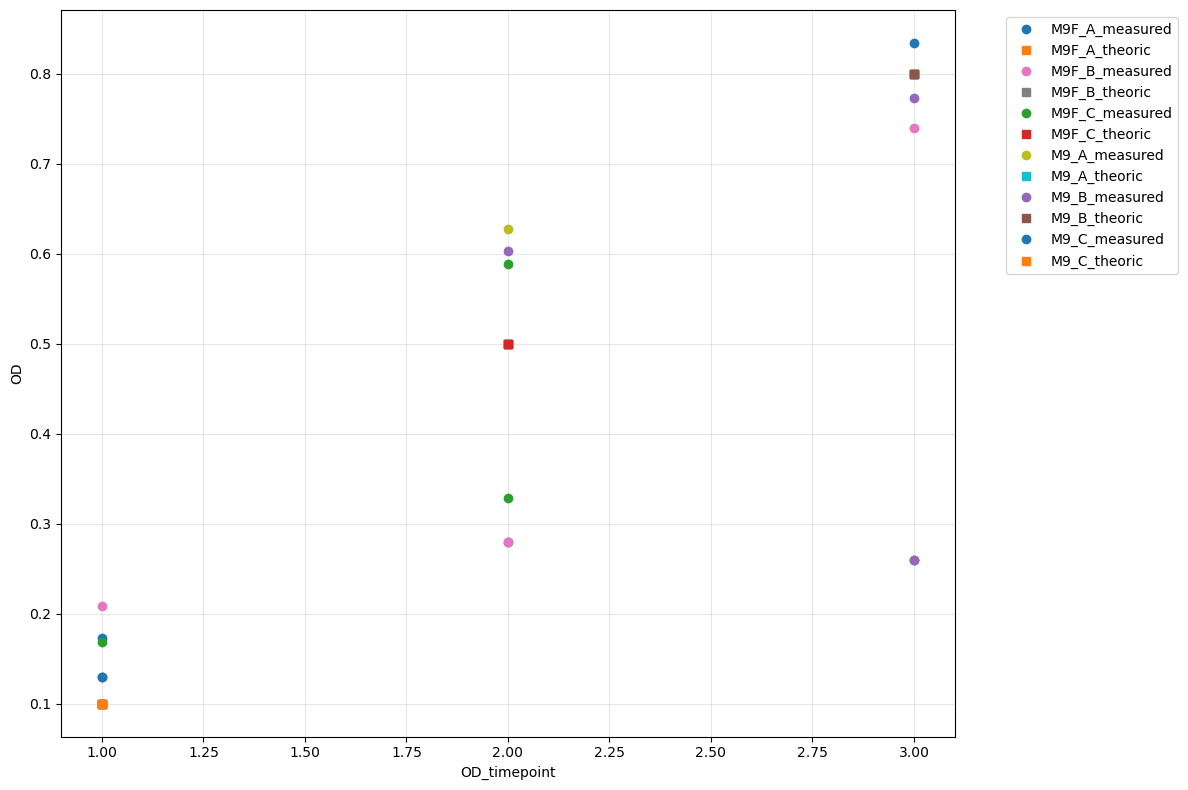


=== Tableau complet des combinaisons ===
CultureMedium RepBio OD_timepoint  Rep_tech  OD_theoric  OD_measured
           M9      A          OD1         1         0.1        0.130
           M9      A          OD1         2         0.1        0.130
           M9      A          OD1         3         0.1        0.130
           M9      A          OD1         4         0.1        0.130
           M9      A          OD1         5         0.1        0.130
           M9      A          OD2         1         0.5        0.280
           M9      A          OD2         2         0.5        0.280
           M9      A          OD2         3         0.5        0.280
           M9      A          OD2         4         0.5        0.280
           M9      A          OD2         5         0.5        0.280
           M9      A          OD3         1         0.8        0.260
           M9      A          OD3         2         0.8        0.260
           M9      A          OD3         3         0.8      

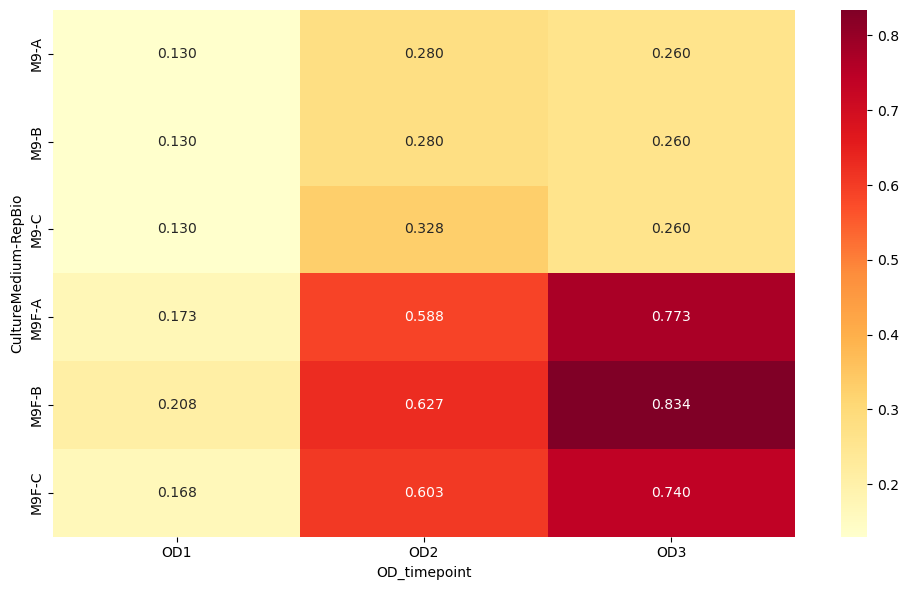

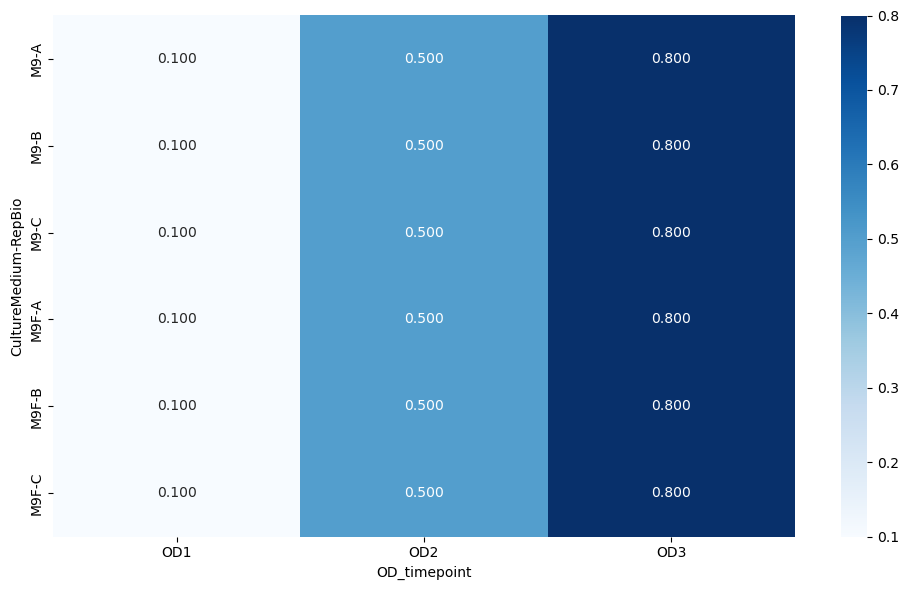

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
df = pd.read_excel(
    r"/Users/valentingoupille/Desktop/microsplit_DOL/data/raw_data/metadata_cell/metadata_DOL_rep1.xlsx"
)

# Rename columns
df = df.rename(columns={"Culture_medium": "CultureMedium", "Rep_bio": "RepBio"})

# Create a combination column for easier analysis
df["combination"] = df["CultureMedium"] + "_" + df["RepBio"] + "_" + df["OD_timepoint"]

print("=== Valeurs OD_measured et OD_theoric individuelles par combinaison ===")
for combo in sorted(df["combination"].unique()):
    combo_data = df[df["combination"] == combo]
    print(f"\n{combo}:")
    print(f"  OD_measured: {combo_data['OD_measured'].iloc[0]:.3f}")
    print(f"  OD_theoric: {combo_data['OD_theoric'].iloc[0]:.3f}")
    print(f"  Rep_tech: {combo_data['Rep_tech'].iloc[0]}")

# Create a line plot showing OD values over time for each CultureMedium_RepBio combination
plt.figure(figsize=(12, 8))
for combo in sorted(df["combination"].unique()):
    combo_data = df[df["combination"] == combo]
    culture_rep = (
        combo_data["CultureMedium"].iloc[0] + "_" + combo_data["RepBio"].iloc[0]
    )
    od_timepoint = combo_data["OD_timepoint"].iloc[0]
    od_measured = combo_data["OD_measured"].iloc[0]
    od_theoric = combo_data["OD_theoric"].iloc[0]

    # Convert OD_timepoint to numeric for x-axis
    timepoint_num = int(od_timepoint.replace("OD", ""))

    plt.plot(
        timepoint_num,
        od_measured,
        "o",
        label=f"{culture_rep}_measured" if od_timepoint == "OD1" else "",
    )
    plt.plot(
        timepoint_num,
        od_theoric,
        "s",
        label=f"{culture_rep}_theoric" if od_timepoint == "OD1" else "",
    )

plt.xlabel("OD_timepoint")
plt.ylabel("OD")
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Create a table showing all combinations with their OD values
print("\n=== Tableau complet des combinaisons ===")
result_table = df[
    ["CultureMedium", "RepBio", "OD_timepoint", "Rep_tech", "OD_theoric", "OD_measured"]
].copy()
result_table = result_table.sort_values(["CultureMedium", "RepBio", "OD_timepoint"])
print(result_table.to_string(index=False))

# Create a pivot table showing individual OD values (measured and theoric)
pivot_measured = df.pivot_table(
    values="OD_measured",
    index=["CultureMedium", "RepBio"],
    columns="OD_timepoint",
    aggfunc="first",  # Use first value since there's only one per combination
).round(3)
pivot_theoric = df.pivot_table(
    values="OD_theoric",
    index=["CultureMedium", "RepBio"],
    columns="OD_timepoint",
    aggfunc="first",
).round(3)

print("\n=== Tableau croisé des valeurs OD_measured individuelles ===")
print(pivot_measured)
print("\n=== Tableau croisé des valeurs OD_theoric individuelles ===")
print(pivot_theoric)

# Plot heatmap of individual values (measured)
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_measured, annot=True, cmap="YlOrRd", fmt=".3f")
plt.tight_layout()
plt.show()

# Plot heatmap of individual values (theoric)
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_theoric, annot=True, cmap="Blues", fmt=".3f")
plt.tight_layout()
plt.show()

=== Valeurs OD_measured et OD_theoric individuelles par combinaison ===

M9F_A_OD1:
  OD_measured: 0.173
  OD_theoric: 0.100
  Rep_tech: 1

M9F_A_OD2:
  OD_measured: 0.588
  OD_theoric: 0.500
  Rep_tech: 1

M9F_A_OD3:
  OD_measured: 0.773
  OD_theoric: 0.800
  Rep_tech: 1

M9F_B_OD1:
  OD_measured: 0.208
  OD_theoric: 0.100
  Rep_tech: 1

M9F_B_OD2:
  OD_measured: 0.627
  OD_theoric: 0.500
  Rep_tech: 1

M9F_B_OD3:
  OD_measured: 0.834
  OD_theoric: 0.800
  Rep_tech: 1

M9F_C_OD1:
  OD_measured: 0.168
  OD_theoric: 0.100
  Rep_tech: 1

M9F_C_OD2:
  OD_measured: 0.603
  OD_theoric: 0.500
  Rep_tech: 1

M9F_C_OD3:
  OD_measured: 0.740
  OD_theoric: 0.800
  Rep_tech: 1

M9_A_OD1:
  OD_measured: 0.130
  OD_theoric: 0.100
  Rep_tech: 1

M9_A_OD2:
  OD_measured: 0.280
  OD_theoric: 0.500
  Rep_tech: 1

M9_A_OD3:
  OD_measured: 0.260
  OD_theoric: 0.800
  Rep_tech: 1

M9_B_OD1:
  OD_measured: 0.130
  OD_theoric: 0.100
  Rep_tech: 1

M9_B_OD2:
  OD_measured: 0.280
  OD_theoric: 0.500
  Rep_tec

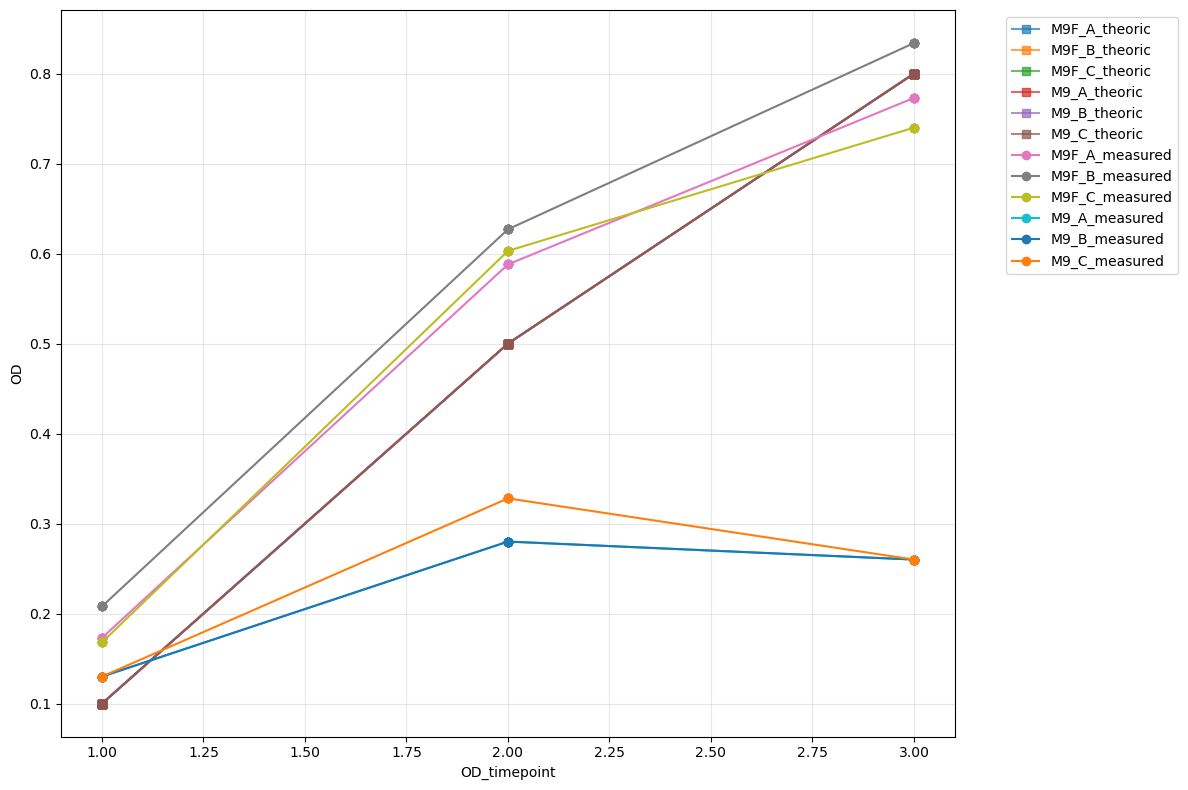


=== Tableau complet des combinaisons ===
CultureMedium RepBio OD_timepoint  Rep_tech  OD_theoric  OD_measured
           M9      A          OD1         1         0.1        0.130
           M9      A          OD1         2         0.1        0.130
           M9      A          OD1         3         0.1        0.130
           M9      A          OD1         4         0.1        0.130
           M9      A          OD1         5         0.1        0.130
           M9      A          OD2         1         0.5        0.280
           M9      A          OD2         2         0.5        0.280
           M9      A          OD2         3         0.5        0.280
           M9      A          OD2         4         0.5        0.280
           M9      A          OD2         5         0.5        0.280
           M9      A          OD3         1         0.8        0.260
           M9      A          OD3         2         0.8        0.260
           M9      A          OD3         3         0.8      

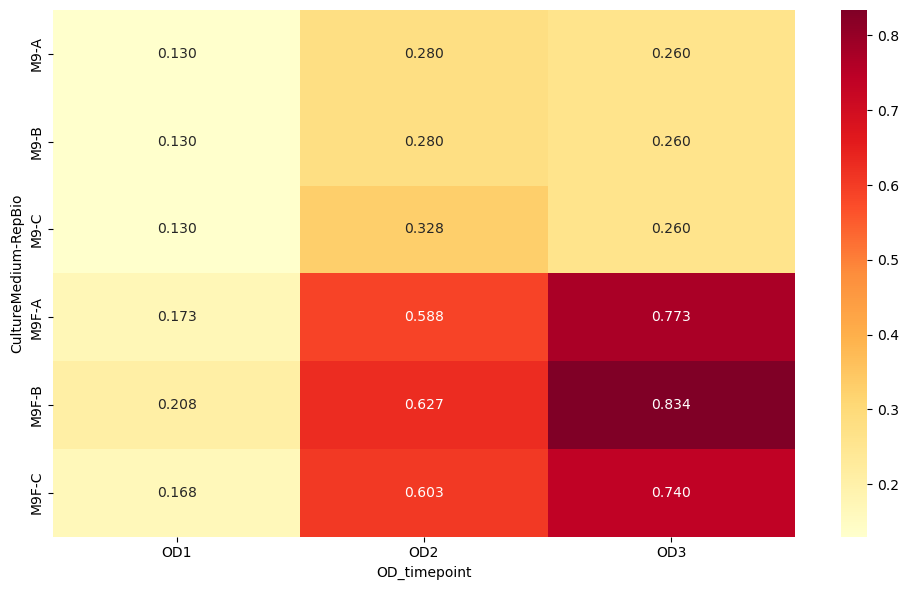

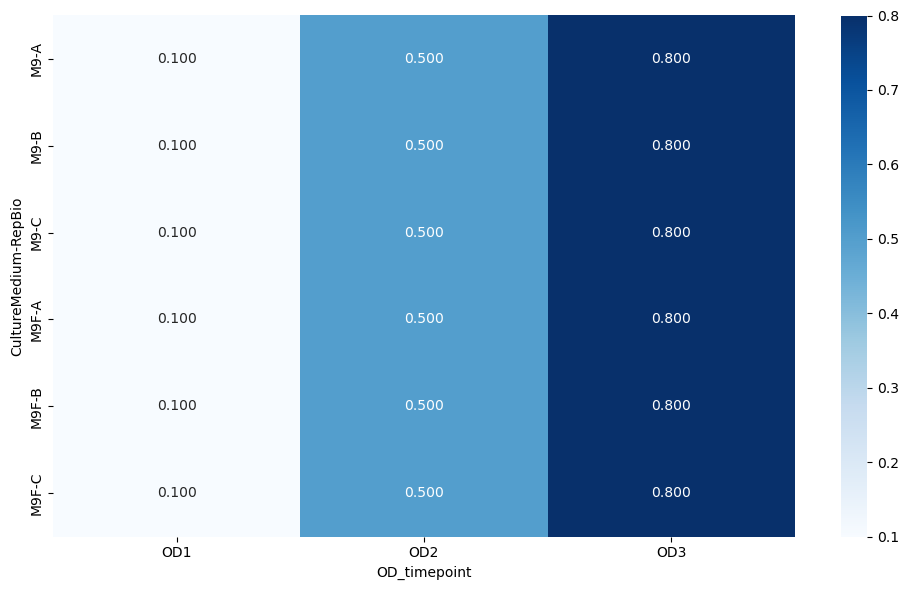

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
df = pd.read_excel(
    r"/Users/valentingoupille/Desktop/microsplit_DOL/data/raw_data/metadata_cell/metadata_DOL_rep1.xlsx"
)

# Rename columns
df = df.rename(columns={"Culture_medium": "CultureMedium", "Rep_bio": "RepBio"})

# Create a combination column for easier analysis
df["combination"] = df["CultureMedium"] + "_" + df["RepBio"] + "_" + df["OD_timepoint"]

print("=== Valeurs OD_measured et OD_theoric individuelles par combinaison ===")
for combo in sorted(df["combination"].unique()):
    combo_data = df[df["combination"] == combo]
    print(f"\n{combo}:")
    print(f"  OD_measured: {combo_data['OD_measured'].iloc[0]:.3f}")
    print(f"  OD_theoric: {combo_data['OD_theoric'].iloc[0]:.3f}")
    print(f"  Rep_tech: {combo_data['Rep_tech'].iloc[0]}")

# Create a line plot showing OD values over time for each CultureMedium_RepBio combination
plt.figure(figsize=(12, 8))

# Create culture_rep combinations properly
df["culture_rep"] = df["CultureMedium"] + "_" + df["RepBio"]

# Plot OD_theoric lines (one per CultureMedium_RepBio combination)
for culture_rep in sorted(df["culture_rep"].unique()):
    culture, rep = culture_rep.split("_")
    combo_data = df[(df["CultureMedium"] == culture) & (df["RepBio"] == rep)]

    # Get timepoints and theoric values
    timepoints = [int(od.replace("OD", "")) for od in combo_data["OD_timepoint"]]
    theoric_values = combo_data["OD_theoric"].values

    plt.plot(
        timepoints, theoric_values, "s-", label=f"{culture_rep}_theoric", alpha=0.7
    )

# Plot OD_measured lines (one per CultureMedium_RepBio combination)
for culture_rep in sorted(df["culture_rep"].unique()):
    culture, rep = culture_rep.split("_")
    combo_data = df[(df["CultureMedium"] == culture) & (df["RepBio"] == rep)]

    # Get timepoints and measured values
    timepoints = [int(od.replace("OD", "")) for od in combo_data["OD_timepoint"]]
    measured_values = combo_data["OD_measured"].values

    plt.plot(timepoints, measured_values, "o-", label=f"{culture_rep}_measured")

plt.xlabel("OD_timepoint")
plt.ylabel("OD")
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Create a table showing all combinations with their OD values
print("\n=== Tableau complet des combinaisons ===")
result_table = df[
    ["CultureMedium", "RepBio", "OD_timepoint", "Rep_tech", "OD_theoric", "OD_measured"]
].copy()
result_table = result_table.sort_values(["CultureMedium", "RepBio", "OD_timepoint"])
print(result_table.to_string(index=False))

# Create a pivot table showing individual OD values (measured and theoric)
pivot_measured = df.pivot_table(
    values="OD_measured",
    index=["CultureMedium", "RepBio"],
    columns="OD_timepoint",
    aggfunc="first",  # Use first value since there's only one per combination
).round(3)
pivot_theoric = df.pivot_table(
    values="OD_theoric",
    index=["CultureMedium", "RepBio"],
    columns="OD_timepoint",
    aggfunc="first",
).round(3)

print("\n=== Tableau croisé des valeurs OD_measured individuelles ===")
print(pivot_measured)
print("\n=== Tableau croisé des valeurs OD_theoric individuelles ===")
print(pivot_theoric)

# Plot heatmap of individual values (measured)
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_measured, annot=True, cmap="YlOrRd", fmt=".3f")
plt.tight_layout()
plt.show()

# Plot heatmap of individual values (theoric)
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_theoric, annot=True, cmap="Blues", fmt=".3f")
plt.tight_layout()
plt.show()

=== Valeurs OD_measured et OD_theoric individuelles par combinaison ===

M9F_A_OD1:
  OD_measured: 0.173
  OD_theoric: 0.100
  Rep_tech: 1

M9F_A_OD2:
  OD_measured: 0.588
  OD_theoric: 0.500
  Rep_tech: 1

M9F_A_OD3:
  OD_measured: 0.773
  OD_theoric: 0.800
  Rep_tech: 1

M9F_B_OD1:
  OD_measured: 0.208
  OD_theoric: 0.100
  Rep_tech: 1

M9F_B_OD2:
  OD_measured: 0.627
  OD_theoric: 0.500
  Rep_tech: 1

M9F_B_OD3:
  OD_measured: 0.834
  OD_theoric: 0.800
  Rep_tech: 1

M9F_C_OD1:
  OD_measured: 0.168
  OD_theoric: 0.100
  Rep_tech: 1

M9F_C_OD2:
  OD_measured: 0.603
  OD_theoric: 0.500
  Rep_tech: 1

M9F_C_OD3:
  OD_measured: 0.740
  OD_theoric: 0.800
  Rep_tech: 1

M9_A_OD1:
  OD_measured: 0.130
  OD_theoric: 0.100
  Rep_tech: 1

M9_A_OD2:
  OD_measured: 0.280
  OD_theoric: 0.500
  Rep_tech: 1

M9_A_OD3:
  OD_measured: 0.260
  OD_theoric: 0.800
  Rep_tech: 1

M9_B_OD1:
  OD_measured: 0.130
  OD_theoric: 0.100
  Rep_tech: 1

M9_B_OD2:
  OD_measured: 0.280
  OD_theoric: 0.500
  Rep_tec

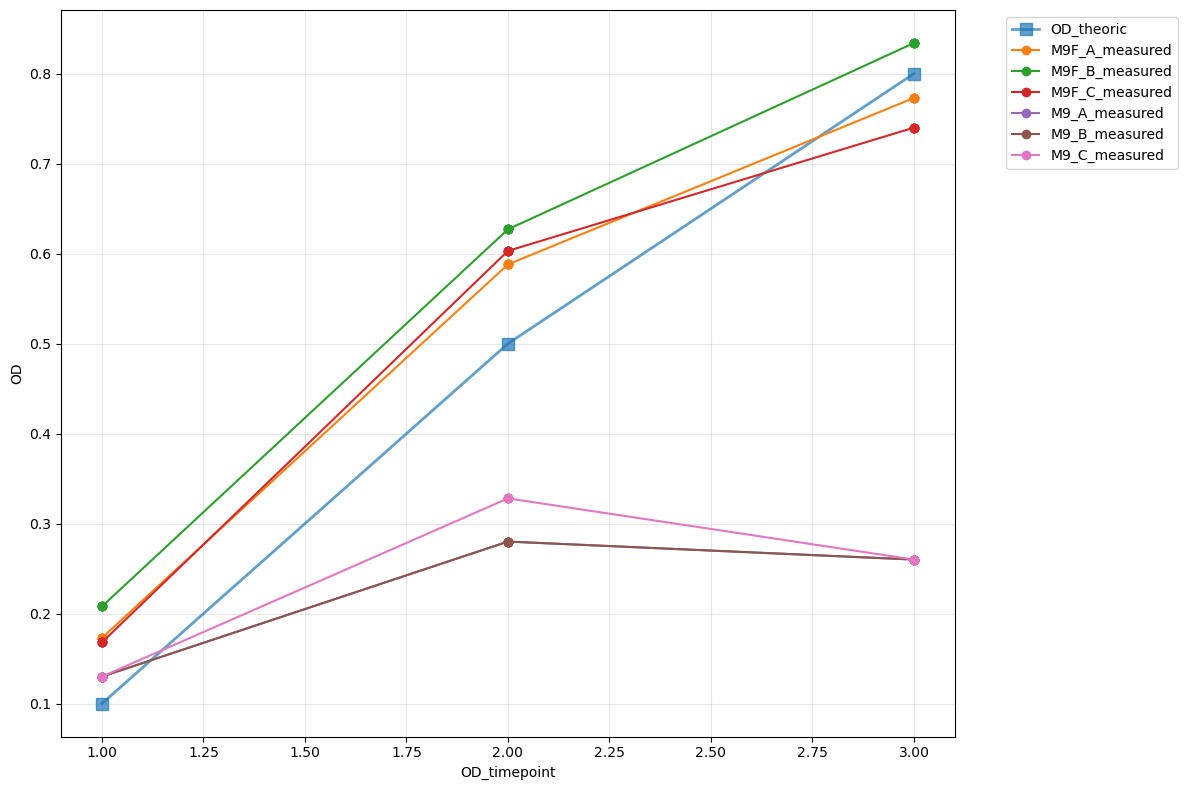


=== Tableau complet des combinaisons ===
CultureMedium RepBio OD_timepoint  Rep_tech  OD_theoric  OD_measured
           M9      A          OD1         1         0.1        0.130
           M9      A          OD1         2         0.1        0.130
           M9      A          OD1         3         0.1        0.130
           M9      A          OD1         4         0.1        0.130
           M9      A          OD1         5         0.1        0.130
           M9      A          OD2         1         0.5        0.280
           M9      A          OD2         2         0.5        0.280
           M9      A          OD2         3         0.5        0.280
           M9      A          OD2         4         0.5        0.280
           M9      A          OD2         5         0.5        0.280
           M9      A          OD3         1         0.8        0.260
           M9      A          OD3         2         0.8        0.260
           M9      A          OD3         3         0.8      

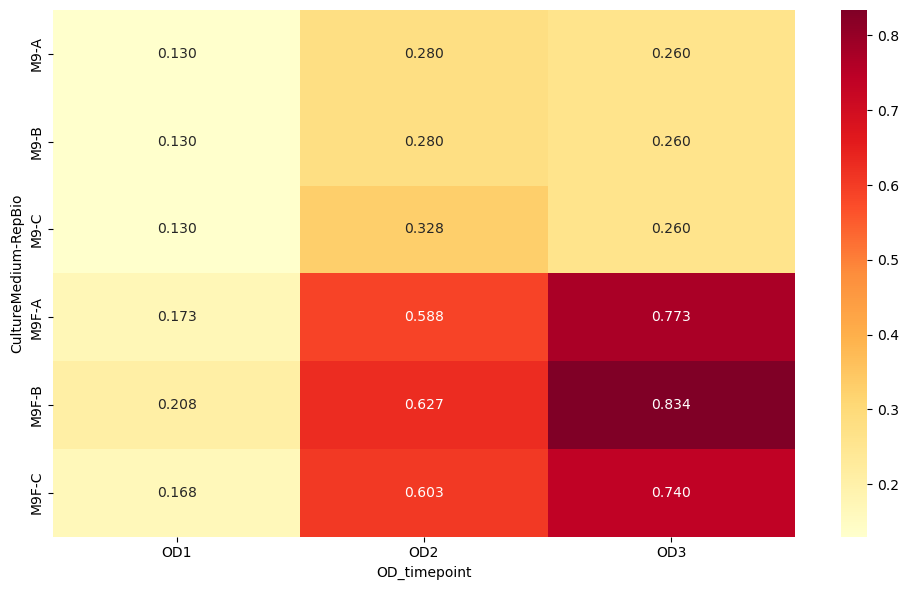

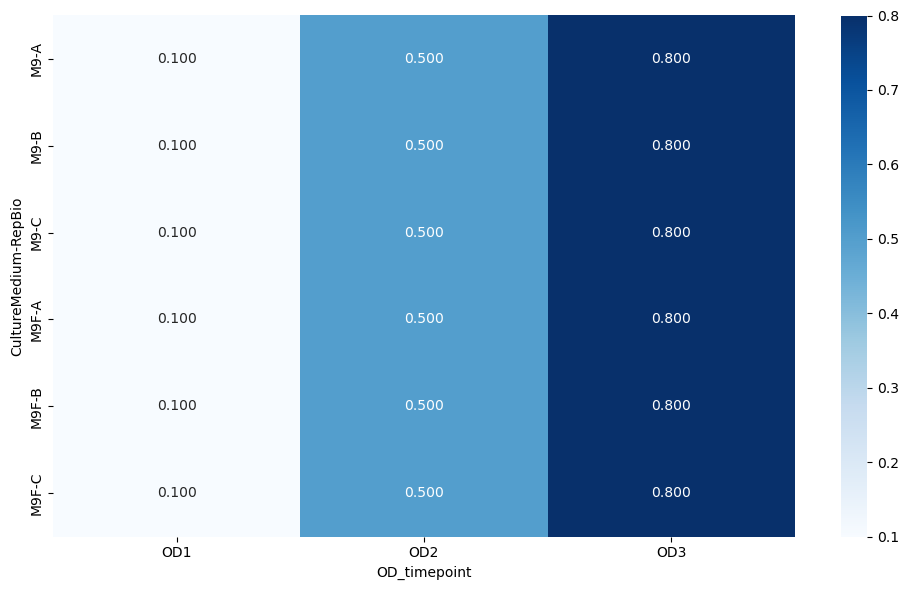

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
df = pd.read_excel(
    r"/Users/valentingoupille/Desktop/microsplit_DOL/data/raw_data/metadata_cell/metadata_DOL_rep1.xlsx"
)

# Rename columns
df = df.rename(columns={"Culture_medium": "CultureMedium", "Rep_bio": "RepBio"})

# Create a combination column for easier analysis
df["combination"] = df["CultureMedium"] + "_" + df["RepBio"] + "_" + df["OD_timepoint"]

print("=== Valeurs OD_measured et OD_theoric individuelles par combinaison ===")
for combo in sorted(df["combination"].unique()):
    combo_data = df[df["combination"] == combo]
    print(f"\n{combo}:")
    print(f"  OD_measured: {combo_data['OD_measured'].iloc[0]:.3f}")
    print(f"  OD_theoric: {combo_data['OD_theoric'].iloc[0]:.3f}")
    print(f"  Rep_tech: {combo_data['Rep_tech'].iloc[0]}")

# Create a line plot showing OD values over time for each CultureMedium_RepBio combination
plt.figure(figsize=(12, 8))

# Create culture_rep combinations properly
df["culture_rep"] = df["CultureMedium"] + "_" + df["RepBio"]

# Plot one line for OD_theoric (same values for all replicates)
theoric_data = df.groupby("OD_timepoint")["OD_theoric"].first()
timepoints_theoric = [int(od.replace("OD", "")) for od in theoric_data.index]
theoric_values = theoric_data.values
plt.plot(
    timepoints_theoric,
    theoric_values,
    "s-",
    label="OD_theoric",
    linewidth=2,
    markersize=8,
    alpha=0.7,
)

# Plot OD_measured lines (one per CultureMedium_RepBio combination)
for culture_rep in sorted(df["culture_rep"].unique()):
    culture, rep = culture_rep.split("_")
    combo_data = df[(df["CultureMedium"] == culture) & (df["RepBio"] == rep)]

    # Get timepoints and measured values
    timepoints = [int(od.replace("OD", "")) for od in combo_data["OD_timepoint"]]
    measured_values = combo_data["OD_measured"].values

    plt.plot(timepoints, measured_values, "o-", label=f"{culture_rep}_measured")

plt.xlabel("OD_timepoint")
plt.ylabel("OD")
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Create a table showing all combinations with their OD values
print("\n=== Tableau complet des combinaisons ===")
result_table = df[
    ["CultureMedium", "RepBio", "OD_timepoint", "Rep_tech", "OD_theoric", "OD_measured"]
].copy()
result_table = result_table.sort_values(["CultureMedium", "RepBio", "OD_timepoint"])
print(result_table.to_string(index=False))

# Create a pivot table showing individual OD values (measured and theoric)
pivot_measured = df.pivot_table(
    values="OD_measured",
    index=["CultureMedium", "RepBio"],
    columns="OD_timepoint",
    aggfunc="first",  # Use first value since there's only one per combination
).round(3)
pivot_theoric = df.pivot_table(
    values="OD_theoric",
    index=["CultureMedium", "RepBio"],
    columns="OD_timepoint",
    aggfunc="first",
).round(3)

print("\n=== Tableau croisé des valeurs OD_measured individuelles ===")
print(pivot_measured)
print("\n=== Tableau croisé des valeurs OD_theoric individuelles ===")
print(pivot_theoric)

# Plot heatmap of individual values (measured)
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_measured, annot=True, cmap="YlOrRd", fmt=".3f")
plt.tight_layout()
plt.show()

# Plot heatmap of individual values (theoric)
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_theoric, annot=True, cmap="Blues", fmt=".3f")
plt.tight_layout()
plt.show()

=== Valeurs OD_measured et OD_theoric individuelles par combinaison ===

M9F_A_OD1:
  OD_measured: 0.173
  OD_theoric: 0.100
  Rep_tech: 1

M9F_A_OD2:
  OD_measured: 0.588
  OD_theoric: 0.500
  Rep_tech: 1

M9F_A_OD3:
  OD_measured: 0.773
  OD_theoric: 0.800
  Rep_tech: 1

M9F_B_OD1:
  OD_measured: 0.208
  OD_theoric: 0.100
  Rep_tech: 1

M9F_B_OD2:
  OD_measured: 0.627
  OD_theoric: 0.500
  Rep_tech: 1

M9F_B_OD3:
  OD_measured: 0.834
  OD_theoric: 0.800
  Rep_tech: 1

M9F_C_OD1:
  OD_measured: 0.168
  OD_theoric: 0.100
  Rep_tech: 1

M9F_C_OD2:
  OD_measured: 0.603
  OD_theoric: 0.500
  Rep_tech: 1

M9F_C_OD3:
  OD_measured: 0.740
  OD_theoric: 0.800
  Rep_tech: 1

M9_A_OD1:
  OD_measured: 0.130
  OD_theoric: 0.100
  Rep_tech: 1

M9_A_OD2:
  OD_measured: 0.280
  OD_theoric: 0.500
  Rep_tech: 1

M9_A_OD3:
  OD_measured: 0.260
  OD_theoric: 0.800
  Rep_tech: 1

M9_B_OD1:
  OD_measured: 0.130
  OD_theoric: 0.100
  Rep_tech: 1

M9_B_OD2:
  OD_measured: 0.280
  OD_theoric: 0.500
  Rep_tec

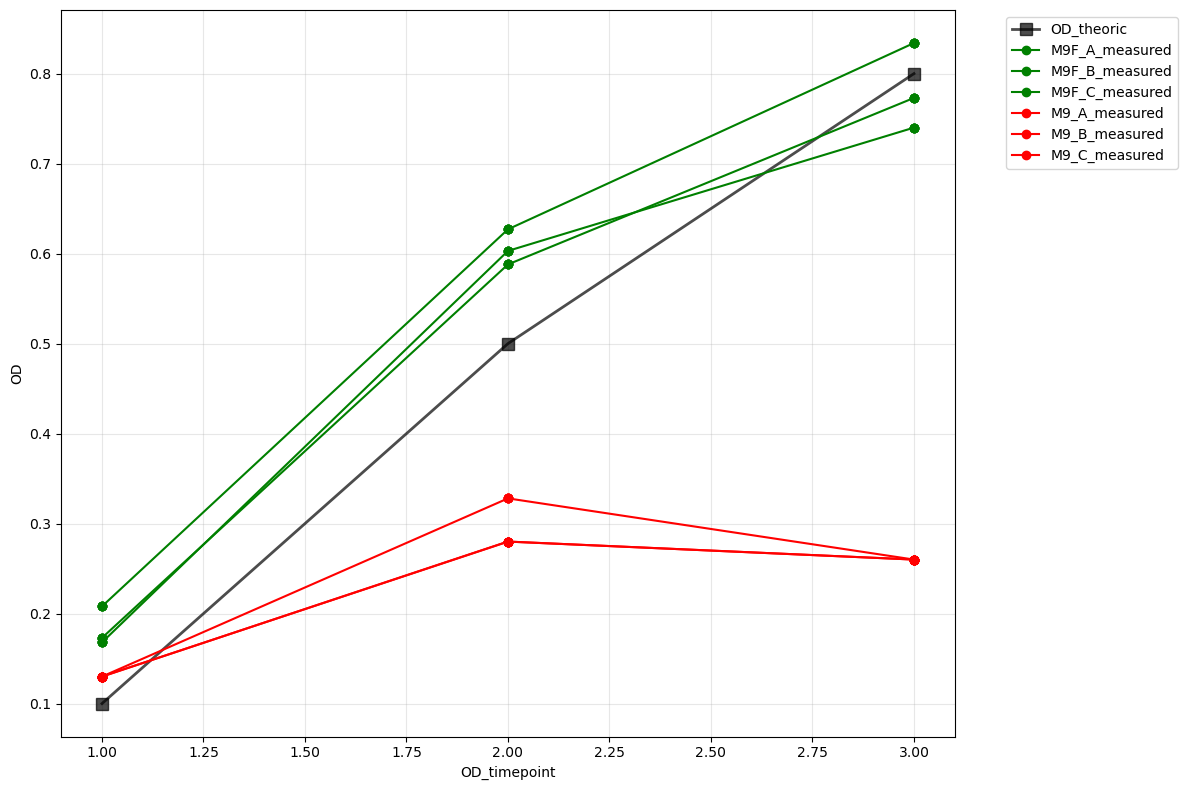


=== Tableau complet des combinaisons ===
CultureMedium RepBio OD_timepoint  Rep_tech  OD_theoric  OD_measured
           M9      A          OD1         1         0.1        0.130
           M9      A          OD1         2         0.1        0.130
           M9      A          OD1         3         0.1        0.130
           M9      A          OD1         4         0.1        0.130
           M9      A          OD1         5         0.1        0.130
           M9      A          OD2         1         0.5        0.280
           M9      A          OD2         2         0.5        0.280
           M9      A          OD2         3         0.5        0.280
           M9      A          OD2         4         0.5        0.280
           M9      A          OD2         5         0.5        0.280
           M9      A          OD3         1         0.8        0.260
           M9      A          OD3         2         0.8        0.260
           M9      A          OD3         3         0.8      

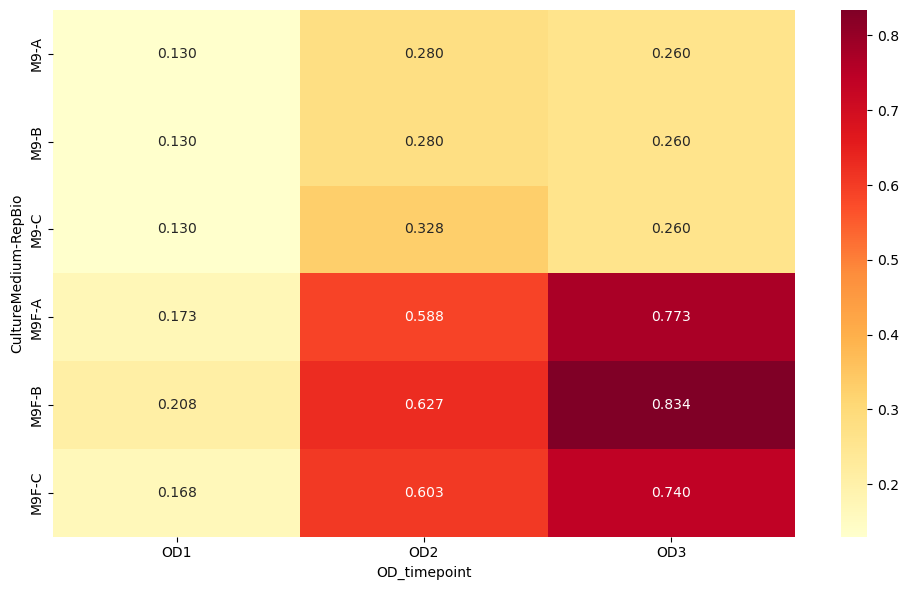

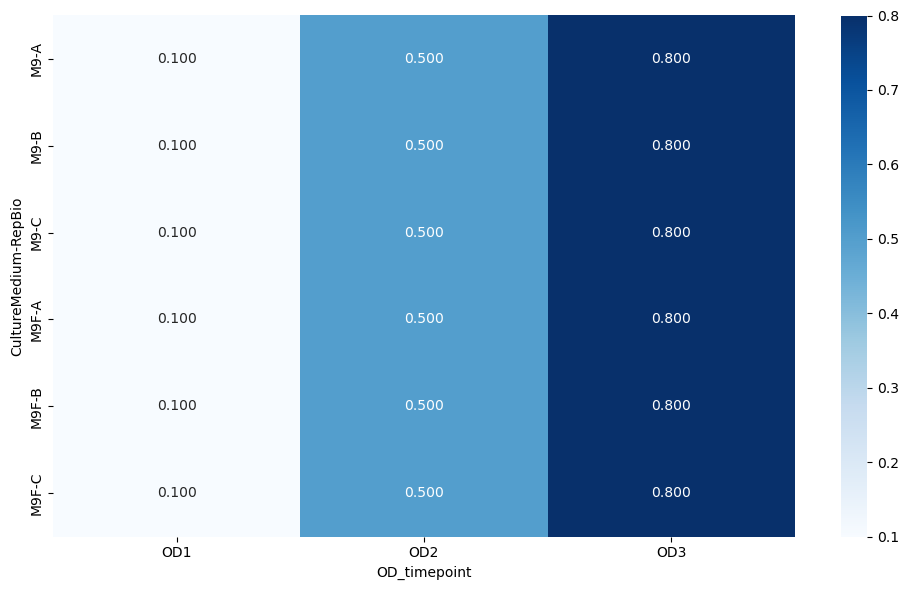

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
df = pd.read_excel(
    r"/Users/valentingoupille/Desktop/microsplit_DOL/data/raw_data/metadata_cell/metadata_DOL_rep1.xlsx"
)

# Rename columns
df = df.rename(columns={"Culture_medium": "CultureMedium", "Rep_bio": "RepBio"})

# Create a combination column for easier analysis
df["combination"] = df["CultureMedium"] + "_" + df["RepBio"] + "_" + df["OD_timepoint"]

print("=== Valeurs OD_measured et OD_theoric individuelles par combinaison ===")
for combo in sorted(df["combination"].unique()):
    combo_data = df[df["combination"] == combo]
    print(f"\n{combo}:")
    print(f"  OD_measured: {combo_data['OD_measured'].iloc[0]:.3f}")
    print(f"  OD_theoric: {combo_data['OD_theoric'].iloc[0]:.3f}")
    print(f"  Rep_tech: {combo_data['Rep_tech'].iloc[0]}")

# Create a line plot showing OD values over time for each CultureMedium_RepBio combination
plt.figure(figsize=(12, 8))

# Create culture_rep combinations properly
df["culture_rep"] = df["CultureMedium"] + "_" + df["RepBio"]

# Define colors for different culture mediums
colors = {"M9": "red", "M9F": "green"}

# Plot one line for OD_theoric (same values for all replicates)
theoric_data = df.groupby("OD_timepoint")["OD_theoric"].first()
timepoints_theoric = [int(od.replace("OD", "")) for od in theoric_data.index]
theoric_values = theoric_data.values
plt.plot(
    timepoints_theoric,
    theoric_values,
    "s-",
    label="OD_theoric",
    linewidth=2,
    markersize=8,
    alpha=0.7,
    color="black",
)

# Plot OD_measured lines (one per CultureMedium_RepBio combination)
for culture_rep in sorted(df["culture_rep"].unique()):
    culture, rep = culture_rep.split("_")
    combo_data = df[(df["CultureMedium"] == culture) & (df["RepBio"] == rep)]

    # Get timepoints and measured values
    timepoints = [int(od.replace("OD", "")) for od in combo_data["OD_timepoint"]]
    measured_values = combo_data["OD_measured"].values

    # Use different color based on culture medium
    color = colors.get(culture, "gray")
    plt.plot(
        timepoints, measured_values, "o-", label=f"{culture_rep}_measured", color=color
    )

plt.xlabel("OD_timepoint")
plt.ylabel("OD")
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Create a table showing all combinations with their OD values
print("\n=== Tableau complet des combinaisons ===")
result_table = df[
    ["CultureMedium", "RepBio", "OD_timepoint", "Rep_tech", "OD_theoric", "OD_measured"]
].copy()
result_table = result_table.sort_values(["CultureMedium", "RepBio", "OD_timepoint"])
print(result_table.to_string(index=False))

# Create a pivot table showing individual OD values (measured and theoric)
pivot_measured = df.pivot_table(
    values="OD_measured",
    index=["CultureMedium", "RepBio"],
    columns="OD_timepoint",
    aggfunc="first",  # Use first value since there's only one per combination
).round(3)
pivot_theoric = df.pivot_table(
    values="OD_theoric",
    index=["CultureMedium", "RepBio"],
    columns="OD_timepoint",
    aggfunc="first",
).round(3)

print("\n=== Tableau croisé des valeurs OD_measured individuelles ===")
print(pivot_measured)
print("\n=== Tableau croisé des valeurs OD_theoric individuelles ===")
print(pivot_theoric)

# Plot heatmap of individual values (measured)
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_measured, annot=True, cmap="YlOrRd", fmt=".3f")
plt.tight_layout()
plt.show()

# Plot heatmap of individual values (theoric)
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_theoric, annot=True, cmap="Blues", fmt=".3f")
plt.tight_layout()
plt.show()

=== Valeurs OD_measured et OD_theoric individuelles par combinaison ===

M9F_A_OD1:
  OD_measured: 0.173
  OD_theoric: 0.100
  Rep_tech: 1

M9F_A_OD2:
  OD_measured: 0.588
  OD_theoric: 0.500
  Rep_tech: 1

M9F_A_OD3:
  OD_measured: 0.773
  OD_theoric: 0.800
  Rep_tech: 1

M9F_B_OD1:
  OD_measured: 0.208
  OD_theoric: 0.100
  Rep_tech: 1

M9F_B_OD2:
  OD_measured: 0.627
  OD_theoric: 0.500
  Rep_tech: 1

M9F_B_OD3:
  OD_measured: 0.834
  OD_theoric: 0.800
  Rep_tech: 1

M9F_C_OD1:
  OD_measured: 0.168
  OD_theoric: 0.100
  Rep_tech: 1

M9F_C_OD2:
  OD_measured: 0.603
  OD_theoric: 0.500
  Rep_tech: 1

M9F_C_OD3:
  OD_measured: 0.740
  OD_theoric: 0.800
  Rep_tech: 1

M9_A_OD1:
  OD_measured: 0.130
  OD_theoric: 0.100
  Rep_tech: 1

M9_A_OD2:
  OD_measured: 0.280
  OD_theoric: 0.500
  Rep_tech: 1

M9_A_OD3:
  OD_measured: 0.260
  OD_theoric: 0.800
  Rep_tech: 1

M9_B_OD1:
  OD_measured: 0.130
  OD_theoric: 0.100
  Rep_tech: 1

M9_B_OD2:
  OD_measured: 0.280
  OD_theoric: 0.500
  Rep_tec

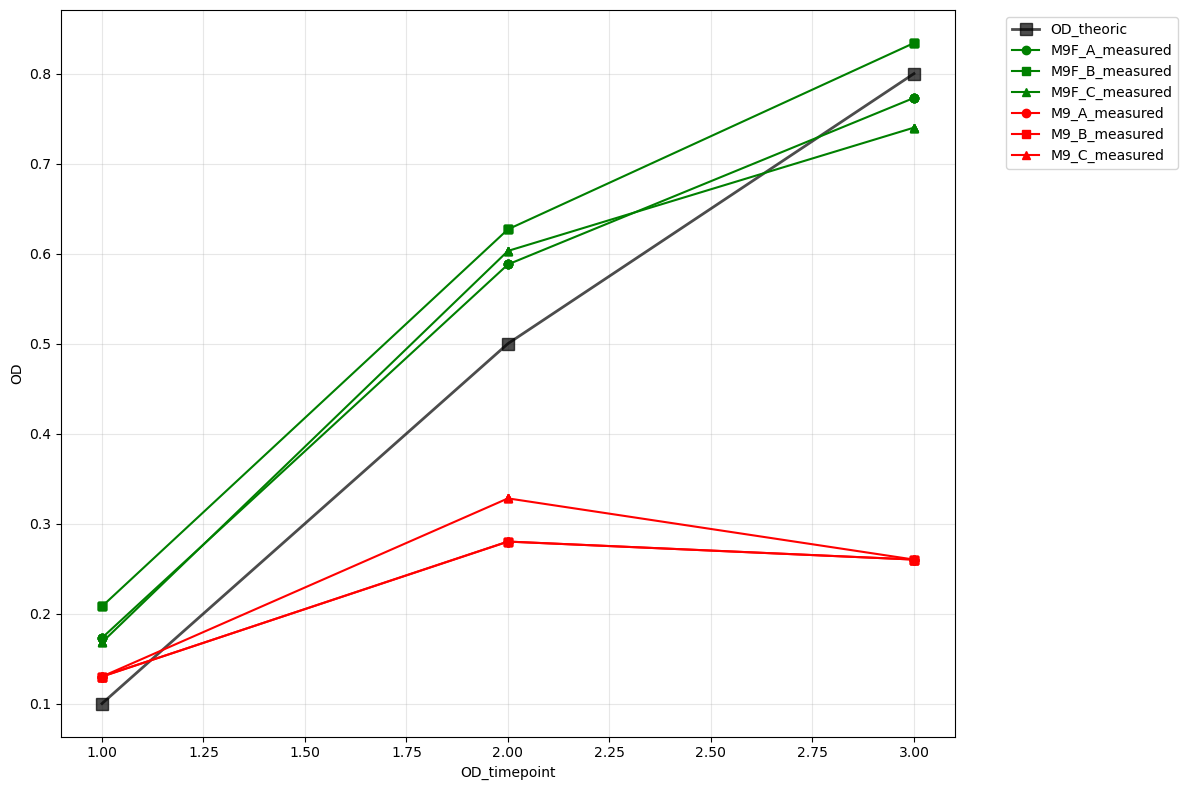


=== Tableau complet des combinaisons ===
CultureMedium RepBio OD_timepoint  Rep_tech  OD_theoric  OD_measured
           M9      A          OD1         1         0.1        0.130
           M9      A          OD1         2         0.1        0.130
           M9      A          OD1         3         0.1        0.130
           M9      A          OD1         4         0.1        0.130
           M9      A          OD1         5         0.1        0.130
           M9      A          OD2         1         0.5        0.280
           M9      A          OD2         2         0.5        0.280
           M9      A          OD2         3         0.5        0.280
           M9      A          OD2         4         0.5        0.280
           M9      A          OD2         5         0.5        0.280
           M9      A          OD3         1         0.8        0.260
           M9      A          OD3         2         0.8        0.260
           M9      A          OD3         3         0.8      

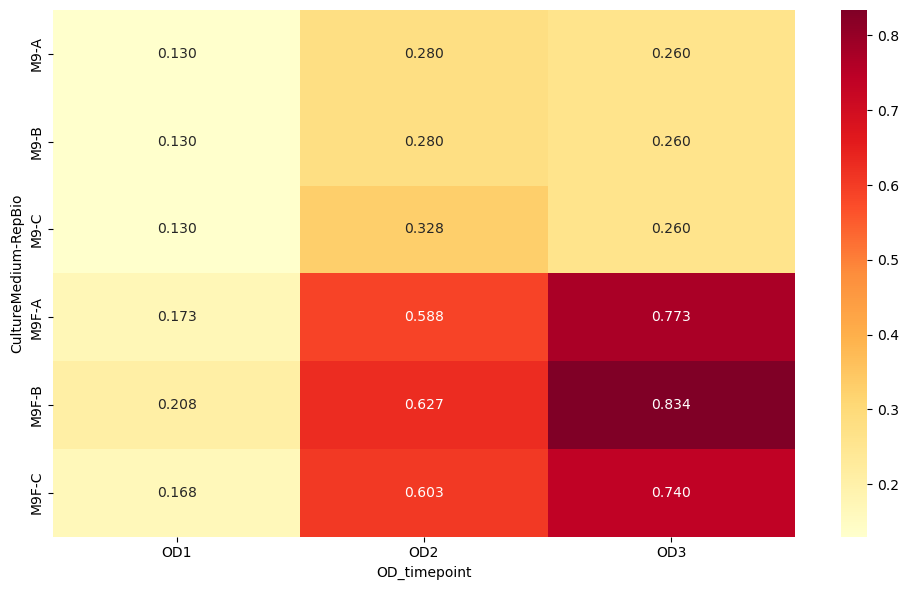

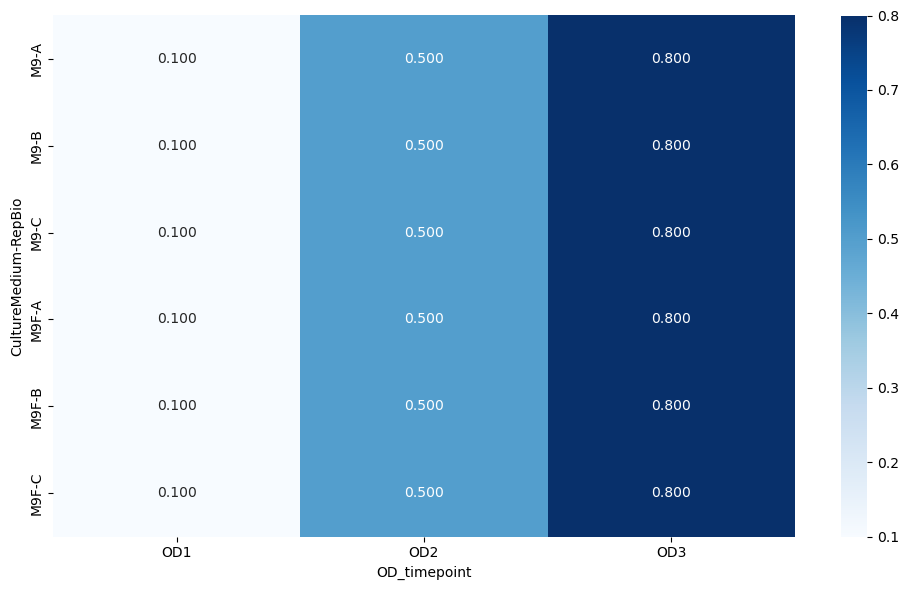

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
df = pd.read_excel(
    r"/Users/valentingoupille/Desktop/microsplit_DOL/data/raw_data/metadata_cell/metadata_DOL_rep1.xlsx"
)

# Rename columns
df = df.rename(columns={"Culture_medium": "CultureMedium", "Rep_bio": "RepBio"})

# Create a combination column for easier analysis
df["combination"] = df["CultureMedium"] + "_" + df["RepBio"] + "_" + df["OD_timepoint"]

print("=== Valeurs OD_measured et OD_theoric individuelles par combinaison ===")
for combo in sorted(df["combination"].unique()):
    combo_data = df[df["combination"] == combo]
    print(f"\n{combo}:")
    print(f"  OD_measured: {combo_data['OD_measured'].iloc[0]:.3f}")
    print(f"  OD_theoric: {combo_data['OD_theoric'].iloc[0]:.3f}")
    print(f"  Rep_tech: {combo_data['Rep_tech'].iloc[0]}")

# Create a line plot showing OD values over time for each CultureMedium_RepBio combination
plt.figure(figsize=(12, 8))

# Create culture_rep combinations properly
df["culture_rep"] = df["CultureMedium"] + "_" + df["RepBio"]

# Define colors for different culture mediums
colors = {"M9": "red", "M9F": "green"}

# Define markers for different biological replicates
markers = {"A": "o", "B": "s", "C": "^"}

# Plot one line for OD_theoric (same values for all replicates)
theoric_data = df.groupby("OD_timepoint")["OD_theoric"].first()
timepoints_theoric = [int(od.replace("OD", "")) for od in theoric_data.index]
theoric_values = theoric_data.values
plt.plot(
    timepoints_theoric,
    theoric_values,
    "s-",
    label="OD_theoric",
    linewidth=2,
    markersize=8,
    alpha=0.7,
    color="black",
)

# Plot OD_measured lines (one per CultureMedium_RepBio combination)
for culture_rep in sorted(df["culture_rep"].unique()):
    culture, rep = culture_rep.split("_")
    combo_data = df[(df["CultureMedium"] == culture) & (df["RepBio"] == rep)]

    # Get timepoints and measured values
    timepoints = [int(od.replace("OD", "")) for od in combo_data["OD_timepoint"]]
    measured_values = combo_data["OD_measured"].values

    # Use different color based on culture medium and marker based on biological replicate
    color = colors.get(culture, "gray")
    marker = markers.get(rep, "o")
    plt.plot(
        timepoints,
        measured_values,
        marker + "-",
        label=f"{culture_rep}_measured",
        color=color,
        markersize=6,
    )

plt.xlabel("OD_timepoint")
plt.ylabel("OD")
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Create a table showing all combinations with their OD values
print("\n=== Tableau complet des combinaisons ===")
result_table = df[
    ["CultureMedium", "RepBio", "OD_timepoint", "Rep_tech", "OD_theoric", "OD_measured"]
].copy()
result_table = result_table.sort_values(["CultureMedium", "RepBio", "OD_timepoint"])
print(result_table.to_string(index=False))

# Create a pivot table showing individual OD values (measured and theoric)
pivot_measured = df.pivot_table(
    values="OD_measured",
    index=["CultureMedium", "RepBio"],
    columns="OD_timepoint",
    aggfunc="first",  # Use first value since there's only one per combination
).round(3)
pivot_theoric = df.pivot_table(
    values="OD_theoric",
    index=["CultureMedium", "RepBio"],
    columns="OD_timepoint",
    aggfunc="first",
).round(3)

print("\n=== Tableau croisé des valeurs OD_measured individuelles ===")
print(pivot_measured)
print("\n=== Tableau croisé des valeurs OD_theoric individuelles ===")
print(pivot_theoric)

# Plot heatmap of individual values (measured)
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_measured, annot=True, cmap="YlOrRd", fmt=".3f")
plt.tight_layout()
plt.show()

# Plot heatmap of individual values (theoric)
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_theoric, annot=True, cmap="Blues", fmt=".3f")
plt.tight_layout()
plt.show()

=== Valeurs OD_measured et OD_theoric individuelles par combinaison ===

M9F_A_OD1:
  OD_measured: 0.173
  OD_theoric: 0.100
  Rep_tech: 1

M9F_A_OD2:
  OD_measured: 0.588
  OD_theoric: 0.500
  Rep_tech: 1

M9F_A_OD3:
  OD_measured: 0.773
  OD_theoric: 0.800
  Rep_tech: 1

M9F_B_OD1:
  OD_measured: 0.208
  OD_theoric: 0.100
  Rep_tech: 1

M9F_B_OD2:
  OD_measured: 0.627
  OD_theoric: 0.500
  Rep_tech: 1

M9F_B_OD3:
  OD_measured: 0.834
  OD_theoric: 0.800
  Rep_tech: 1

M9F_C_OD1:
  OD_measured: 0.168
  OD_theoric: 0.100
  Rep_tech: 1

M9F_C_OD2:
  OD_measured: 0.603
  OD_theoric: 0.500
  Rep_tech: 1

M9F_C_OD3:
  OD_measured: 0.740
  OD_theoric: 0.800
  Rep_tech: 1

M9_A_OD1:
  OD_measured: 0.130
  OD_theoric: 0.100
  Rep_tech: 1

M9_A_OD2:
  OD_measured: 0.280
  OD_theoric: 0.500
  Rep_tech: 1

M9_A_OD3:
  OD_measured: 0.260
  OD_theoric: 0.800
  Rep_tech: 1

M9_B_OD1:
  OD_measured: 0.130
  OD_theoric: 0.100
  Rep_tech: 1

M9_B_OD2:
  OD_measured: 0.280
  OD_theoric: 0.500
  Rep_tec

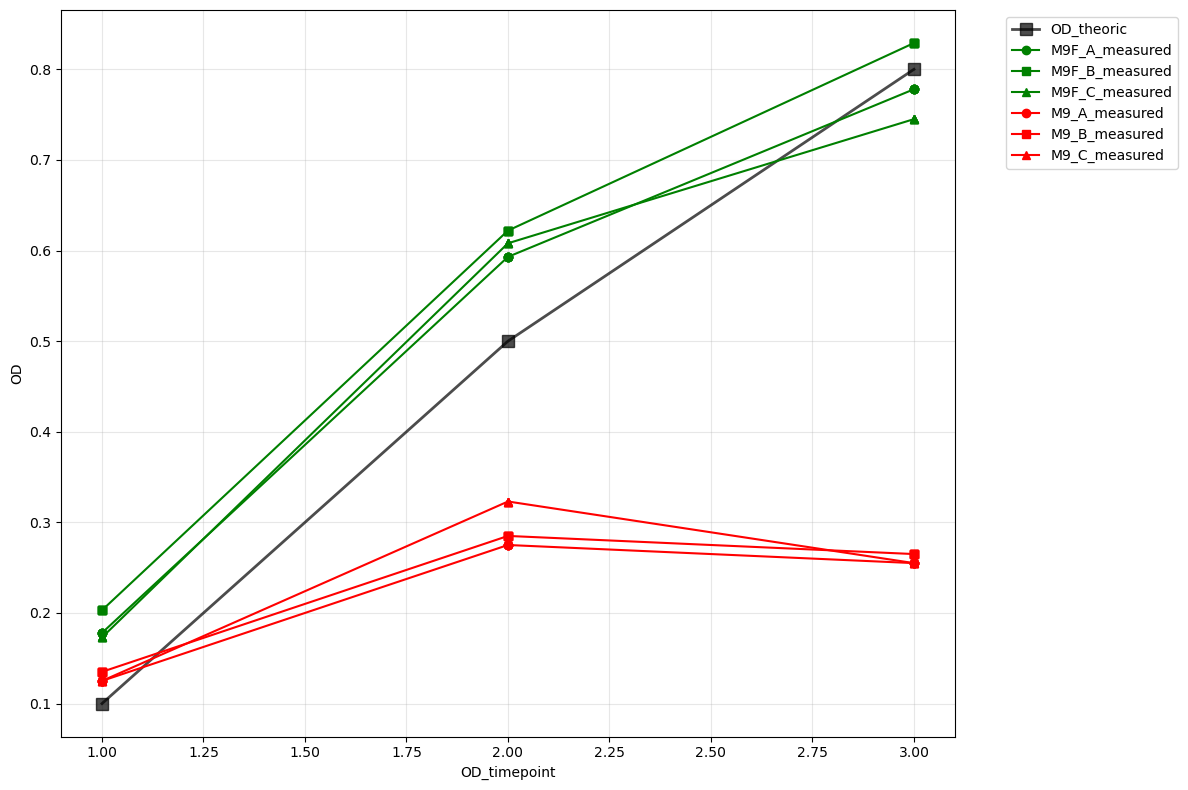


=== Tableau complet des combinaisons ===
CultureMedium RepBio OD_timepoint  Rep_tech  OD_theoric  OD_measured
           M9      A          OD1         1         0.1        0.130
           M9      A          OD1         2         0.1        0.130
           M9      A          OD1         3         0.1        0.130
           M9      A          OD1         4         0.1        0.130
           M9      A          OD1         5         0.1        0.130
           M9      A          OD2         1         0.5        0.280
           M9      A          OD2         2         0.5        0.280
           M9      A          OD2         3         0.5        0.280
           M9      A          OD2         4         0.5        0.280
           M9      A          OD2         5         0.5        0.280
           M9      A          OD3         1         0.8        0.260
           M9      A          OD3         2         0.8        0.260
           M9      A          OD3         3         0.8      

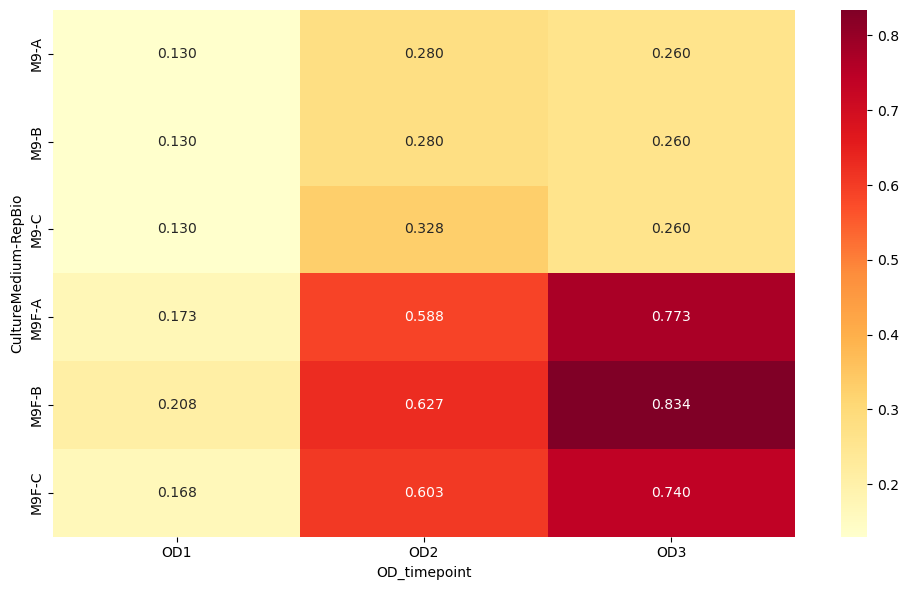

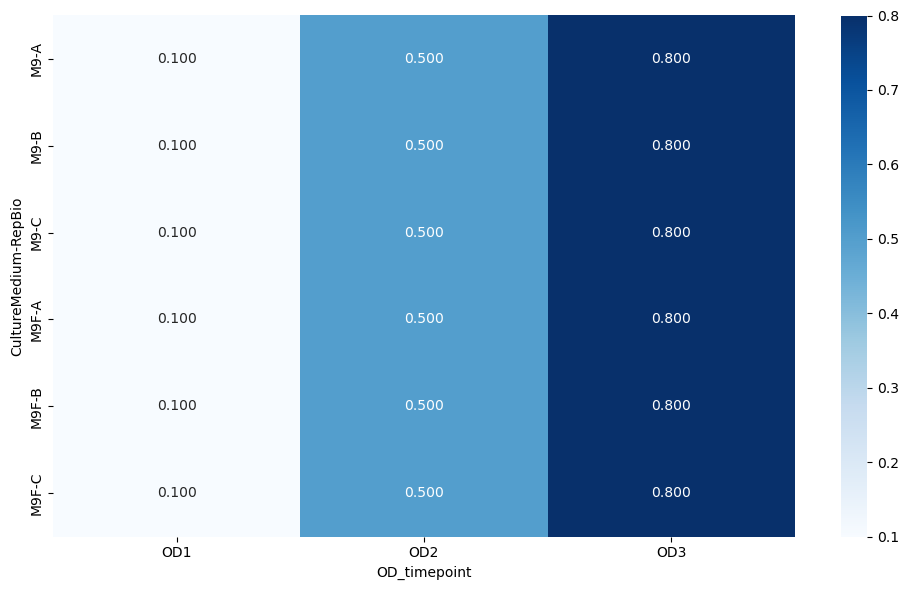

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load the data
df = pd.read_excel(
    r"/Users/valentingoupille/Desktop/microsplit_DOL/data/raw_data/metadata_cell/metadata_DOL_rep1.xlsx"
)

# Rename columns
df = df.rename(columns={"Culture_medium": "CultureMedium", "Rep_bio": "RepBio"})

# Create a combination column for easier analysis
df["combination"] = df["CultureMedium"] + "_" + df["RepBio"] + "_" + df["OD_timepoint"]

print("=== Valeurs OD_measured et OD_theoric individuelles par combinaison ===")
for combo in sorted(df["combination"].unique()):
    combo_data = df[df["combination"] == combo]
    print(f"\n{combo}:")
    print(f"  OD_measured: {combo_data['OD_measured'].iloc[0]:.3f}")
    print(f"  OD_theoric: {combo_data['OD_theoric'].iloc[0]:.3f}")
    print(f"  Rep_tech: {combo_data['Rep_tech'].iloc[0]}")

# Create a line plot showing OD values over time for each CultureMedium_RepBio combination
plt.figure(figsize=(12, 8))

# Create culture_rep combinations properly
df["culture_rep"] = df["CultureMedium"] + "_" + df["RepBio"]

# Define colors for different culture mediums
colors = {"M9": "red", "M9F": "green"}

# Define markers for different biological replicates
markers = {"A": "o", "B": "s", "C": "^"}

# Plot one line for OD_theoric (same values for all replicates)
theoric_data = df.groupby("OD_timepoint")["OD_theoric"].first()
timepoints_theoric = [int(od.replace("OD", "")) for od in theoric_data.index]
theoric_values = theoric_data.values
plt.plot(
    timepoints_theoric,
    theoric_values,
    "s-",
    label="OD_theoric",
    linewidth=2,
    markersize=8,
    alpha=0.7,
    color="black",
)

# Plot OD_measured lines (one per CultureMedium_RepBio combination)
for i, culture_rep in enumerate(sorted(df["culture_rep"].unique())):
    culture, rep = culture_rep.split("_")
    combo_data = df[(df["CultureMedium"] == culture) & (df["RepBio"] == rep)]

    # Get timepoints and measured values
    timepoints = [int(od.replace("OD", "")) for od in combo_data["OD_timepoint"]]
    measured_values = combo_data["OD_measured"].values

    # Add small offset to prevent overlapping (alternate between positive and negative)
    offset = 0.005 * (1 if i % 2 == 0 else -1)
    measured_values_with_offset = measured_values + offset

    # Use different color based on culture medium and marker based on biological replicate
    color = colors.get(culture, "gray")
    marker = markers.get(rep, "o")
    plt.plot(
        timepoints,
        measured_values_with_offset,
        marker + "-",
        label=f"{culture_rep}_measured",
        color=color,
        markersize=6,
    )

plt.xlabel("OD_timepoint")
plt.ylabel("OD")
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Create a table showing all combinations with their OD values
print("\n=== Tableau complet des combinaisons ===")
result_table = df[
    ["CultureMedium", "RepBio", "OD_timepoint", "Rep_tech", "OD_theoric", "OD_measured"]
].copy()
result_table = result_table.sort_values(["CultureMedium", "RepBio", "OD_timepoint"])
print(result_table.to_string(index=False))

# Create a pivot table showing individual OD values (measured and theoric)
pivot_measured = df.pivot_table(
    values="OD_measured",
    index=["CultureMedium", "RepBio"],
    columns="OD_timepoint",
    aggfunc="first",  # Use first value since there's only one per combination
).round(3)
pivot_theoric = df.pivot_table(
    values="OD_theoric",
    index=["CultureMedium", "RepBio"],
    columns="OD_timepoint",
    aggfunc="first",
).round(3)

print("\n=== Tableau croisé des valeurs OD_measured individuelles ===")
print(pivot_measured)
print("\n=== Tableau croisé des valeurs OD_theoric individuelles ===")
print(pivot_theoric)

# Plot heatmap of individual values (measured)
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_measured, annot=True, cmap="YlOrRd", fmt=".3f")
plt.tight_layout()
plt.show()

# Plot heatmap of individual values (theoric)
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_theoric, annot=True, cmap="Blues", fmt=".3f")
plt.tight_layout()
plt.show()

In [14]:
print("\n=== Tableau croisé des valeurs OD_measured individuelles ===")
print(pivot_measured)
print("\n=== Tableau croisé des valeurs OD_theoric individuelles ===")
print(pivot_theoric)


=== Tableau croisé des valeurs OD_measured individuelles ===
OD_timepoint            OD1    OD2    OD3
CultureMedium RepBio                     
M9            A       0.130  0.280  0.260
              B       0.130  0.280  0.260
              C       0.130  0.328  0.260
M9F           A       0.173  0.588  0.773
              B       0.208  0.627  0.834
              C       0.168  0.603  0.740

=== Tableau croisé des valeurs OD_theoric individuelles ===
OD_timepoint          OD1  OD2  OD3
CultureMedium RepBio               
M9            A       0.1  0.5  0.8
              B       0.1  0.5  0.8
              C       0.1  0.5  0.8
M9F           A       0.1  0.5  0.8
              B       0.1  0.5  0.8
              C       0.1  0.5  0.8


=== Valeurs OD_measured et OD_theoric individuelles par combinaison ===

M9F_A_OD1:
  OD_measured: 0.173
  OD_theoric: 0.100
  Rep_tech: 1

M9F_A_OD2:
  OD_measured: 0.588
  OD_theoric: 0.500
  Rep_tech: 1

M9F_A_OD3:
  OD_measured: 0.773
  OD_theoric: 0.800
  Rep_tech: 1

M9F_B_OD1:
  OD_measured: 0.208
  OD_theoric: 0.100
  Rep_tech: 1

M9F_B_OD2:
  OD_measured: 0.627
  OD_theoric: 0.500
  Rep_tech: 1

M9F_B_OD3:
  OD_measured: 0.834
  OD_theoric: 0.800
  Rep_tech: 1

M9F_C_OD1:
  OD_measured: 0.168
  OD_theoric: 0.100
  Rep_tech: 1

M9F_C_OD2:
  OD_measured: 0.603
  OD_theoric: 0.500
  Rep_tech: 1

M9F_C_OD3:
  OD_measured: 0.740
  OD_theoric: 0.800
  Rep_tech: 1

M9_A_OD1:
  OD_measured: 0.130
  OD_theoric: 0.100
  Rep_tech: 1

M9_A_OD2:
  OD_measured: 0.280
  OD_theoric: 0.500
  Rep_tech: 1

M9_A_OD3:
  OD_measured: 0.260
  OD_theoric: 0.800
  Rep_tech: 1

M9_B_OD1:
  OD_measured: 0.130
  OD_theoric: 0.100
  Rep_tech: 1

M9_B_OD2:
  OD_measured: 0.280
  OD_theoric: 0.500
  Rep_tec

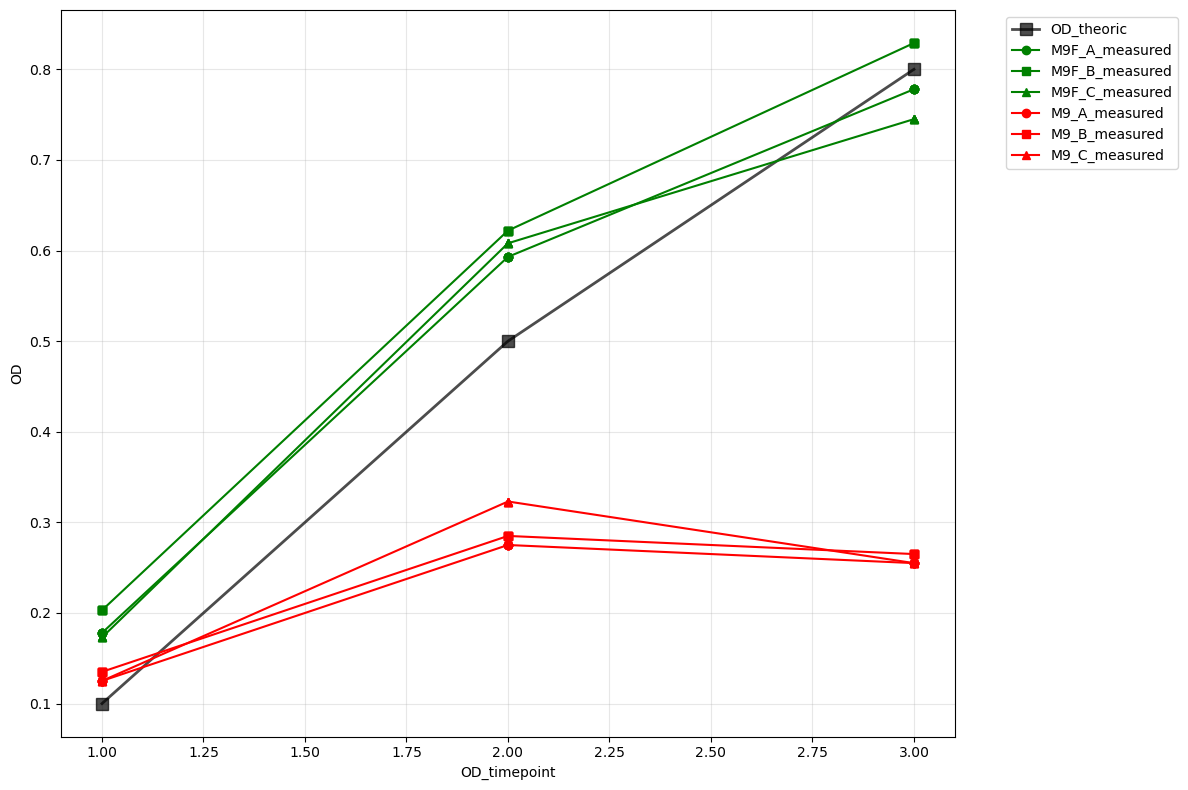


=== Tableau complet des combinaisons ===
CultureMedium RepBio OD_timepoint  Rep_tech  OD_theoric  OD_measured
           M9      A          OD1         1         0.1        0.130
           M9      A          OD1         2         0.1        0.130
           M9      A          OD1         3         0.1        0.130
           M9      A          OD1         4         0.1        0.130
           M9      A          OD1         5         0.1        0.130
           M9      A          OD2         1         0.5        0.280
           M9      A          OD2         2         0.5        0.280
           M9      A          OD2         3         0.5        0.280
           M9      A          OD2         4         0.5        0.280
           M9      A          OD2         5         0.5        0.280
           M9      A          OD3         1         0.8        0.260
           M9      A          OD3         2         0.8        0.260
           M9      A          OD3         3         0.8      

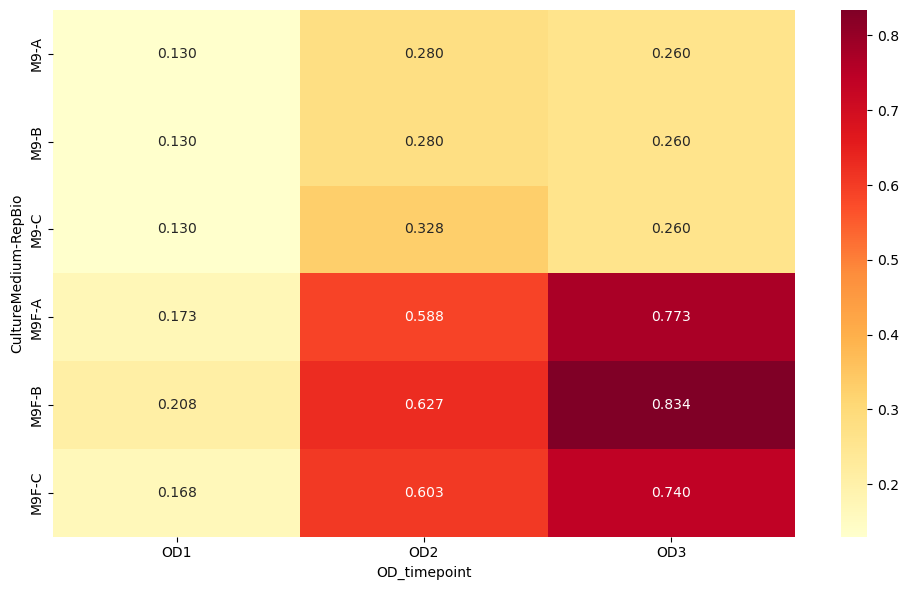

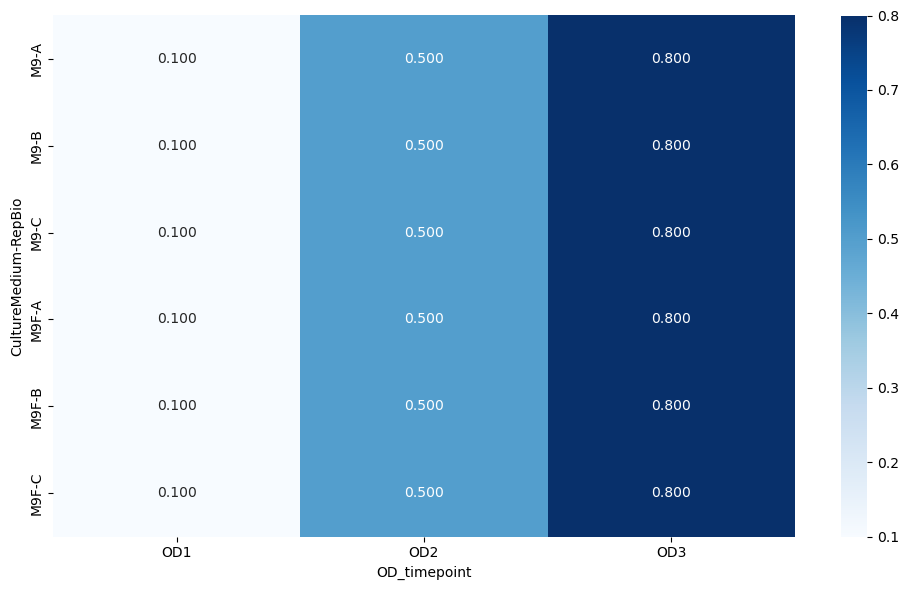

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load the data
df = pd.read_excel(
    r"/Users/valentingoupille/Desktop/microsplit_DOL/data/raw_data/metadata_cell/metadata_DOL_rep1.xlsx"
)

# Rename columns
df = df.rename(columns={"Culture_medium": "CultureMedium", "Rep_bio": "RepBio"})

# Create a combination column for easier analysis
df["combination"] = df["CultureMedium"] + "_" + df["RepBio"] + "_" + df["OD_timepoint"]

print("=== Valeurs OD_measured et OD_theoric individuelles par combinaison ===")
for combo in sorted(df["combination"].unique()):
    combo_data = df[df["combination"] == combo]
    print(f"\n{combo}:")
    print(f"  OD_measured: {combo_data['OD_measured'].iloc[0]:.3f}")
    print(f"  OD_theoric: {combo_data['OD_theoric'].iloc[0]:.3f}")
    print(f"  Rep_tech: {combo_data['Rep_tech'].iloc[0]}")

# Create a line plot showing OD values over time for each CultureMedium_RepBio combination
plt.figure(figsize=(12, 8))

# Create culture_rep combinations properly
df["culture_rep"] = df["CultureMedium"] + "_" + df["RepBio"]

# Define colors for different culture mediums
colors = {"M9": "red", "M9F": "green"}

# Define markers for different biological replicates
markers = {"A": "o", "B": "s", "C": "^"}

# Plot one line for OD_theoric (same values for all replicates)
theoric_data = df.groupby("OD_timepoint")["OD_theoric"].first()
timepoints_theoric = [int(od.replace("OD", "")) for od in theoric_data.index]
theoric_values = theoric_data.values
plt.plot(
    timepoints_theoric,
    theoric_values,
    "s-",
    label="OD_theoric",
    linewidth=2,
    markersize=8,
    alpha=0.7,
    color="black",
)

# Plot OD_measured lines (one per CultureMedium_RepBio combination)
for i, culture_rep in enumerate(sorted(df["culture_rep"].unique())):
    culture, rep = culture_rep.split("_")
    combo_data = df[(df["CultureMedium"] == culture) & (df["RepBio"] == rep)]

    # Get timepoints and measured values
    timepoints = [int(od.replace("OD", "")) for od in combo_data["OD_timepoint"]]
    measured_values = combo_data["OD_measured"].values

    # Add small offset to prevent overlapping (alternate between positive and negative)
    offset = 0.005 * (1 if i % 2 == 0 else -1)
    measured_values_with_offset = measured_values + offset

    # Use different color based on culture medium and marker based on biological replicate
    color = colors.get(culture, "gray")
    marker = markers.get(rep, "o")
    plt.plot(
        timepoints,
        measured_values_with_offset,
        marker + "-",
        label=f"{culture_rep}_measured",
        color=color,
        markersize=6,
    )

plt.xlabel("OD_timepoint")
plt.ylabel("OD")
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Create a table showing all combinations with their OD values
print("\n=== Tableau complet des combinaisons ===")
result_table = df[
    ["CultureMedium", "RepBio", "OD_timepoint", "Rep_tech", "OD_theoric", "OD_measured"]
].copy()
result_table = result_table.sort_values(["CultureMedium", "RepBio", "OD_timepoint"])
print(result_table.to_string(index=False))

# Create a pivot table showing individual OD values (measured and theoric)
pivot_measured = df.pivot_table(
    values="OD_measured",
    index=["CultureMedium", "RepBio"],
    columns="OD_timepoint",
    aggfunc="first",  # Use first value since there's only one per combination
).round(3)
pivot_theoric = df.pivot_table(
    values="OD_theoric",
    index=["CultureMedium", "RepBio"],
    columns="OD_timepoint",
    aggfunc="first",
).round(3)

print("\n=== Tableau croisé des valeurs OD_measured individuelles ===")
print(pivot_measured)
print("\n=== Tableau croisé des valeurs OD_theoric individuelles ===")
print(pivot_theoric)

# Plot heatmap of individual values (measured)
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_measured, annot=True, cmap="YlOrRd", fmt=".3f")
plt.tight_layout()
plt.show()

# Plot heatmap of individual values (theoric)
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_theoric, annot=True, cmap="Blues", fmt=".3f")
plt.tight_layout()
plt.show()

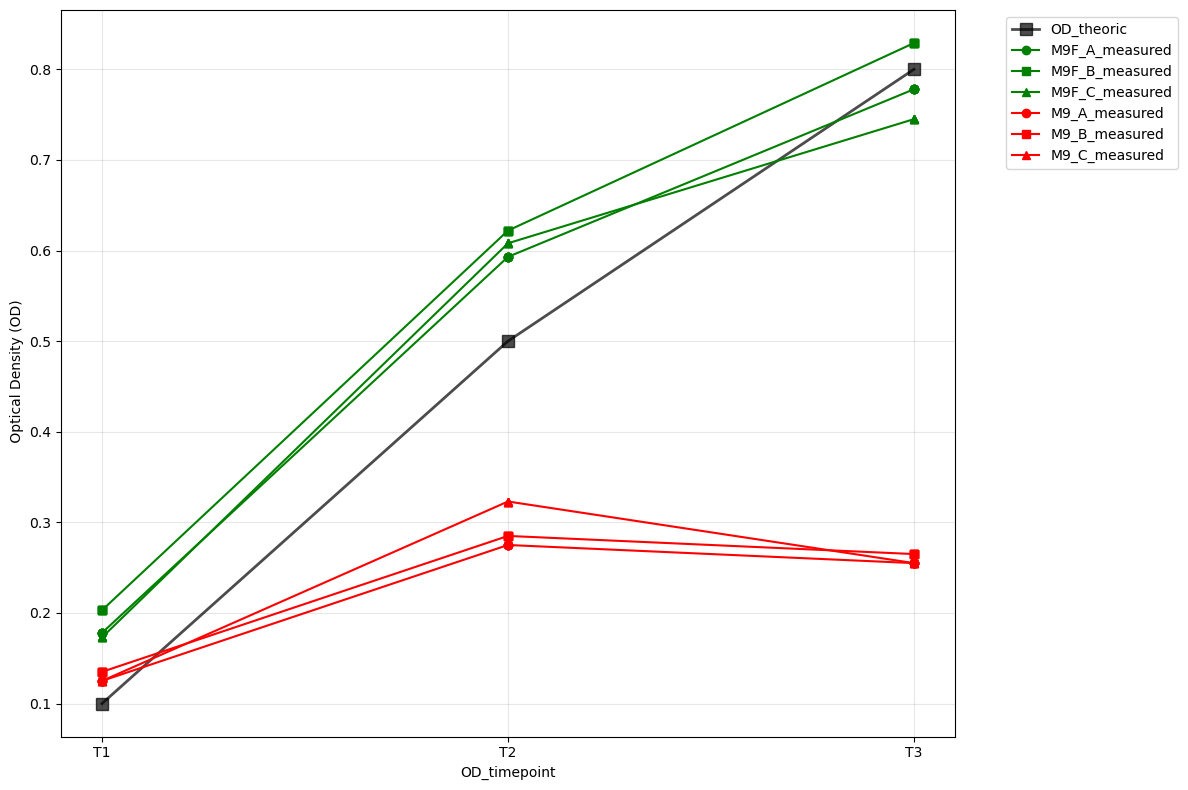

In [3]:
# | label: fig-growth-curves
# | fig-cap: "Bacterial growth dynamics of *P. brassicacearum* R401 populations measured by optical density (OD600) cultured under two different nutrient conditions: M9 (low glucose/iron) and M9F (high glucose/iron). Measurements were taken at three timepoints (T1, T2, T3) for three biological replicates (Rep A, B, C)."
# | notebook-link: true
# | echo: false

# Create a line plot showing OD values over time for each CultureMedium_RepBio combination
plt.figure(figsize=(12, 8))

# Create culture_rep combinations properly
df["culture_rep"] = df["CultureMedium"] + "_" + df["RepBio"]

# Define colors for different culture mediums
colors = {"M9": "red", "M9F": "green"}

# Define markers for different biological replicates
markers = {"A": "o", "B": "s", "C": "^"}

# Plot one line for OD_theoric (same values for all replicates)
theoric_data = df.groupby("OD_timepoint")["OD_theoric"].first()
timepoints_theoric = [int(od.replace("OD", "")) for od in theoric_data.index]
theoric_values = theoric_data.values
plt.plot(
    timepoints_theoric,
    theoric_values,
    "s-",
    label="OD_theoric",
    linewidth=2,
    markersize=8,
    alpha=0.7,
    color="black",
)

# Plot OD_measured lines (one per CultureMedium_RepBio combination)
for i, culture_rep in enumerate(sorted(df["culture_rep"].unique())):
    culture, rep = culture_rep.split("_")
    combo_data = df[(df["CultureMedium"] == culture) & (df["RepBio"] == rep)]

    # Get timepoints and measured values
    timepoints = [int(od.replace("OD", "")) for od in combo_data["OD_timepoint"]]
    measured_values = combo_data["OD_measured"].values

    # Add small offset to prevent overlapping (alternate between positive and negative)
    offset = 0.005 * (1 if i % 2 == 0 else -1)
    measured_values_with_offset = measured_values + offset

    # Use different color based on culture medium and marker based on biological replicate
    color = colors.get(culture, "gray")
    marker = markers.get(rep, "o")
    plt.plot(
        timepoints,
        measured_values_with_offset,
        marker + "-",
        label=f"{culture_rep}_measured",
        color=color,
        markersize=6,
    )


plt.xlabel("OD_timepoint")
plt.ylabel(" Optical Density (OD)")
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")
plt.grid(True, alpha=0.3)

# Remplace 1 → T1, 2 → T2, etc. sur l'axe X
all_timepoints = sorted(set(int(od.replace("OD", "")) for od in df["OD_timepoint"]))
time_labels = [f"T{tp}" for tp in all_timepoints]
plt.xticks(all_timepoints, time_labels)

plt.tight_layout()
plt.show()

# https://quarto.org/docs/authoring/notebook-embed.html

In [ ]:
print(pivot_measured)

In [40]:
print(pivot_measured)

OD_timepoint            OD1    OD2    OD3
CultureMedium RepBio                     
M9            A       0.130  0.280  0.260
              B       0.130  0.280  0.260
              C       0.130  0.328  0.260
M9F           A       0.173  0.588  0.773
              B       0.208  0.627  0.834
              C       0.168  0.603  0.740
